In [15]:
#SECTION 1 - READ THE CSV AND FORMAT A BIT
import csv
from datetime import datetime, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

file = "c://users/vicki/Python Scripts/TemperatureAnalysis/CornellU"
with open(f'{file}.csv', 'r') as t1:
    fileone = t1.readlines()
    t1.close()

tdata = [item[:-1].split(",") for item in fileone]
for index, item in enumerate(tdata):
    itemdate = datetime(int(item[0][:4]), int(item[0][5:7]), int(item[0][8:]))
    itemdayofyear = itemdate.timetuple().tm_yday # get the Day Of Year (DOY) for each date
    tdata[index].append(itemdayofyear)
    tyear = item[0][:4]
    tdata[index].append(tyear) #and isolate just the year and add
    tdata[index].pop(0) #get rid of the original date field

In [16]:
#find and fix the "M"s in the raw data
row_count = 0
h_fix_count = 0
l_fix_count = 0
for i, item in enumerate(tdata):
    hifix = 0
    lowfix = 0
    row_count += 1
    if item[0].lower() == "na" or item[0] == "*" or item[0] == '':
        for j in range(-10,0): #average the previous ten days and use that to fill the gap
            hifix += int(tdata[i+j][0])
        tdata[i][0] = str(int(hifix/10))
        h_fix_count += 1
    if item[1].lower() == "na" or item[1] == "*" or item[1] == '':
        for j in range(-10,0):
            lowfix += int(tdata[i+j][1])
        tdata[i][1] = str(int(lowfix/10))
        l_fix_count += 1

print(row_count, h_fix_count, l_fix_count)


49827 5 29


In [17]:
for row in tdata:
    print(row)

['79', '52', 152, '1882']
['63', '44', 153, '1882']
['72', '52', 154, '1882']
['67', '55', 155, '1882']
['63', '50', 156, '1882']
['60', '50', 157, '1882']
['71', '51', 158, '1882']
['80', '62', 159, '1882']
['74', '58', 160, '1882']
['70', '49', 161, '1882']
['68', '45', 162, '1882']
['67', '44', 163, '1882']
['72', '50', 164, '1882']
['80', '56', 165, '1882']
['83', '62', 166, '1882']
['80', '63', 167, '1882']
['78', '57', 168, '1882']
['84', '63', 169, '1882']
['83', '67', 170, '1882']
['79', '48', 171, '1882']
['68', '52', 172, '1882']
['74', '48', 173, '1882']
['79', '54', 174, '1882']
['85', '61', 175, '1882']
['89', '71', 176, '1882']
['88', '61', 177, '1882']
['82', '58', 178, '1882']
['81', '60', 179, '1882']
['79', '55', 180, '1882']
['73', '49', 181, '1882']
['66', '56', 182, '1882']
['77', '53', 183, '1882']
['69', '51', 184, '1882']
['62', '53', 187, '1882']
['74', '54', 188, '1882']
['79', '59', 189, '1882']
['80', '62', 190, '1882']
['79', '64', 191, '1882']
['89', '61',

['35', '15', 37, '1888']
['28', '15', 38, '1888']
['34', '24', 39, '1888']
['25', '3', 40, '1888']
['5', '-7', 41, '1888']
['20', '-4', 42, '1888']
['25', '13', 43, '1888']
['26', '13', 44, '1888']
['47', '22', 45, '1888']
['47', '2', 46, '1888']
['3', '-4', 47, '1888']
['36', '-3', 48, '1888']
['32', '22', 49, '1888']
['29', '22', 50, '1888']
['41', '24', 51, '1888']
['49', '27', 52, '1888']
['32', '25', 53, '1888']
['35', '25', 54, '1888']
['42', '26', 55, '1888']
['42', '27', 56, '1888']
['42', '27', 57, '1888']
['34', '12', 58, '1888']
['23', '3', 59, '1888']
['20', '10', 60, '1888']
['32', '19', 61, '1888']
['35', '20', 62, '1888']
['42', '21', 63, '1888']
['22', '6', 64, '1888']
['12', '5', 65, '1888']
['14', '4', 66, '1888']
['18', '7', 67, '1888']
['21', '13', 68, '1888']
['25', '17', 69, '1888']
['33', '17', 70, '1888']
['44', '26', 71, '1888']
['38', '13', 72, '1888']
['14', '0', 73, '1888']
['19', '1', 74, '1888']
['24', '18', 75, '1888']
['41', '20', 76, '1888']
['40', '17'

['23', '5', 5, '1895']
['27', '0', 6, '1895']
['41', '26', 7, '1895']
['41', '32', 8, '1895']
['35', '19', 9, '1895']
['25', '13', 10, '1895']
['41', '20', 11, '1895']
['41', '26', 12, '1895']
['37', '26', 13, '1895']
['30', '2', 14, '1895']
['22', '15', 15, '1895']
['32', '17', 16, '1895']
['38', '17', 17, '1895']
['29', '17', 18, '1895']
['29', '14', 19, '1895']
['21', '4', 20, '1895']
['32', '9', 21, '1895']
['39', '29', 22, '1895']
['31', '18', 23, '1895']
['21', '11', 24, '1895']
['19', '12', 25, '1895']
['33', '14', 26, '1895']
['37', '18', 27, '1895']
['18', '7', 28, '1895']
['15', '6', 29, '1895']
['24', '10', 30, '1895']
['27', '8', 31, '1895']
['18', '12', 32, '1895']
['30', '11', 33, '1895']
['18', '2', 34, '1895']
['19', '1', 35, '1895']
['20', '-1', 36, '1895']
['5', '-8', 37, '1895']
['0', '-8', 38, '1895']
['-1', '-7', 39, '1895']
['0', '-5', 40, '1895']
['14', '-2', 41, '1895']
['18', '12', 42, '1895']
['22', '12', 43, '1895']
['22', '12', 44, '1895']
['26', '17', 45, '

['95', '64', 255, '1900']
['76', '53', 256, '1900']
['79', '56', 257, '1900']
['77', '42', 258, '1900']
['82', '49', 259, '1900']
['82', '51', 260, '1900']
['64', '47', 261, '1900']
['65', '37', 262, '1900']
['70', '38', 263, '1900']
['63', '55', 264, '1900']
['72', '50', 265, '1900']
['70', '49', 266, '1900']
['68', '47', 267, '1900']
['75', '49', 268, '1900']
['82', '54', 269, '1900']
['93', '65', 270, '1900']
['73', '48', 271, '1900']
['70', '40', 272, '1900']
['68', '58', 273, '1900']
['67', '44', 274, '1900']
['73', '45', 275, '1900']
['80', '60', 276, '1900']
['83', '58', 277, '1900']
['83', '60', 278, '1900']
['89', '62', 279, '1900']
['89', '63', 280, '1900']
['80', '53', 281, '1900']
['58', '45', 282, '1900']
['55', '40', 283, '1900']
['56', '41', 284, '1900']
['66', '44', 285, '1900']
['74', '45', 286, '1900']
['69', '46', 287, '1900']
['61', '47', 288, '1900']
['73', '47', 289, '1900']
['67', '33', 290, '1900']
['53', '34', 291, '1900']
['60', '35', 292, '1900']
['48', '28',

['46', '31', 4, '1906']
['37', '30', 5, '1906']
['35', '26', 6, '1906']
['30', '22', 7, '1906']
['23', '10', 8, '1906']
['21', '4', 9, '1906']
['34', '5', 10, '1906']
['40', '18', 11, '1906']
['41', '34', 12, '1906']
['35', '19', 13, '1906']
['36', '20', 14, '1906']
['40', '34', 15, '1906']
['45', '34', 16, '1906']
['35', '27', 17, '1906']
['45', '26', 18, '1906']
['38', '22', 19, '1906']
['43', '25', 20, '1906']
['71', '41', 21, '1906']
['69', '48', 22, '1906']
['65', '40', 23, '1906']
['41', '27', 24, '1906']
['29', '12', 25, '1906']
['40', '15', 26, '1906']
['48', '21', 27, '1906']
['43', '29', 28, '1906']
['34', '12', 29, '1906']
['56', '27', 30, '1906']
['44', '34', 31, '1906']
['37', '24', 32, '1906']
['31', '-2', 33, '1906']
['22', '-1', 34, '1906']
['38', '19', 35, '1906']
['37', '5', 36, '1906']
['7', '-7', 37, '1906']
['19', '-7', 38, '1906']
['30', '-4', 39, '1906']
['35', '13', 40, '1906']
['27', '17', 41, '1906']
['25', '1', 42, '1906']
['39', '18', 43, '1906']
['52', '23'

['85', '71', 193, '1911']
['82', '59', 194, '1911']
['86', '54', 195, '1911']
['85', '58', 196, '1911']
['92', '62', 197, '1911']
['76', '61', 198, '1911']
['81', '55', 199, '1911']
['83', '55', 200, '1911']
['83', '64', 201, '1911']
['85', '52', 202, '1911']
['77', '51', 203, '1911']
['79', '55', 204, '1911']
['82', '58', 205, '1911']
['73', '50', 206, '1911']
['73', '50', 207, '1911']
['80', '50', 208, '1911']
['85', '55', 209, '1911']
['89', '55', 210, '1911']
['85', '65', 211, '1911']
['89', '60', 212, '1911']
['97', '64', 213, '1911']
['90', '69', 214, '1911']
['83', '69', 215, '1911']
['83', '69', 216, '1911']
['88', '67', 217, '1911']
['87', '69', 218, '1911']
['94', '64', 219, '1911']
['95', '71', 220, '1911']
['85', '61', 221, '1911']
['93', '61', 222, '1911']
['85', '66', 223, '1911']
['79', '52', 224, '1911']
['84', '52', 225, '1911']
['91', '54', 226, '1911']
['87', '55', 227, '1911']
['81', '66', 228, '1911']
['85', '65', 229, '1911']
['83', '59', 230, '1911']
['72', '53',

['68', '31', 90, '1917']
['71', '50', 91, '1917']
['66', '50', 92, '1917']
['66', '31', 93, '1917']
['54', '32', 94, '1917']
['54', '38', 95, '1917']
['41', '32', 96, '1917']
['37', '30', 97, '1917']
['37', '32', 98, '1917']
['32', '22', 99, '1917']
['39', '23', 100, '1917']
['59', '28', 101, '1917']
['54', '42', 102, '1917']
['44', '28', 103, '1917']
['38', '29', 104, '1917']
['40', '31', 105, '1917']
['39', '30', 106, '1917']
['60', '29', 107, '1917']
['71', '37', 108, '1917']
['72', '48', 109, '1917']
['78', '52', 110, '1917']
['75', '53', 111, '1917']
['80', '37', 112, '1917']
['67', '34', 113, '1917']
['54', '31', 114, '1917']
['61', '25', 115, '1917']
['62', '41', 116, '1917']
['63', '36', 117, '1917']
['51', '34', 118, '1917']
['63', '30', 119, '1917']
['57', '44', 120, '1917']
['55', '45', 121, '1917']
['48', '37', 122, '1917']
['45', '33', 123, '1917']
['46', '32', 124, '1917']
['45', '36', 125, '1917']
['50', '37', 126, '1917']
['53', '35', 127, '1917']
['57', '39', 128, '191

['19', '-1', 35, '1923']
['17', '2', 36, '1923']
['17', '6', 37, '1923']
['25', '5', 38, '1923']
['42', '16', 39, '1923']
['40', '20', 40, '1923']
['25', '17', 41, '1923']
['32', '7', 42, '1923']
['29', '8', 43, '1923']
['38', '25', 44, '1923']
['33', '15', 45, '1923']
['15', '5', 46, '1923']
['16', '7', 47, '1923']
['14', '7', 48, '1923']
['14', '0', 49, '1923']
['22', '10', 50, '1923']
['25', '5', 51, '1923']
['30', '12', 52, '1923']
['29', '19', 53, '1923']
['24', '9', 54, '1923']
['28', '0', 55, '1923']
['40', '2', 56, '1923']
['40', '15', 57, '1923']
['38', '25', 58, '1923']
['38', '22', 59, '1923']
['36', '17', 60, '1923']
['48', '32', 61, '1923']
['58', '38', 62, '1923']
['55', '35', 63, '1923']
['48', '23', 64, '1923']
['23', '15', 65, '1923']
['24', '14', 66, '1923']
['30', '12', 67, '1923']
['30', '5', 68, '1923']
['42', '20', 69, '1923']
['45', '20', 70, '1923']
['47', '30', 71, '1923']
['45', '26', 72, '1923']
['27', '14', 73, '1923']
['40', '16', 74, '1923']
['45', '33', 7

['33', '11', 59, '1928']
['39', '29', 60, '1928']
['36', '25', 61, '1928']
['34', '25', 62, '1928']
['33', '12', 63, '1928']
['45', '10', 64, '1928']
['28', '10', 65, '1928']
['26', '11', 66, '1928']
['38', '11', 67, '1928']
['32', '21', 68, '1928']
['29', '22', 69, '1928']
['28', '17', 70, '1928']
['42', '8', 71, '1928']
['54', '29', 72, '1928']
['58', '31', 73, '1928']
['53', '35', 74, '1928']
['37', '28', 75, '1928']
['30', '23', 76, '1928']
['33', '23', 77, '1928']
['34', '25', 78, '1928']
['33', '25', 79, '1928']
['35', '25', 80, '1928']
['41', '26', 81, '1928']
['43', '35', 82, '1928']
['44', '26', 83, '1928']
['74', '31', 84, '1928']
['69', '45', 85, '1928']
['70', '43', 86, '1928']
['68', '22', 87, '1928']
['35', '24', 88, '1928']
['39', '21', 89, '1928']
['36', '27', 90, '1928']
['39', '26', 91, '1928']
['45', '24', 92, '1928']
['52', '25', 93, '1928']
['56', '39', 94, '1928']
['74', '46', 95, '1928']
['80', '53', 96, '1928']
['80', '51', 97, '1928']
['75', '52', 98, '1928']
[

['77', '58', 122, '1933']
['68', '43', 123, '1933']
['55', '38', 124, '1933']
['59', '32', 125, '1933']
['56', '44', 126, '1933']
['73', '39', 127, '1933']
['67', '33', 128, '1933']
['56', '38', 129, '1933']
['59', '46', 130, '1933']
['63', '38', 131, '1933']
['76', '48', 132, '1933']
['76', '56', 133, '1933']
['71', '49', 134, '1933']
['70', '47', 135, '1933']
['65', '49', 136, '1933']
['76', '47', 137, '1933']
['81', '45', 138, '1933']
['86', '50', 139, '1933']
['82', '60', 140, '1933']
['69', '51', 141, '1933']
['73', '49', 142, '1933']
['80', '45', 143, '1933']
['78', '51', 144, '1933']
['81', '57', 145, '1933']
['82', '59', 146, '1933']
['79', '64', 147, '1933']
['80', '52', 148, '1933']
['81', '54', 149, '1933']
['80', '59', 150, '1933']
['73', '53', 151, '1933']
['65', '47', 152, '1933']
['83', '42', 153, '1933']
['86', '54', 154, '1933']
['82', '67', 155, '1933']
['81', '56', 156, '1933']
['87', '59', 157, '1933']
['85', '59', 158, '1933']
['94', '57', 159, '1933']
['94', '68',

['68', '39', 268, '1938']
['74', '39', 269, '1938']
['69', '60', 270, '1938']
['73', '41', 271, '1938']
['68', '49', 272, '1938']
['64', '38', 273, '1938']
['58', '42', 274, '1938']
['60', '34', 275, '1938']
['64', '34', 276, '1938']
['68', '33', 277, '1938']
['61', '36', 278, '1938']
['55', '41', 279, '1938']
['57', '27', 280, '1938']
['58', '31', 281, '1938']
['54', '46', 282, '1938']
['68', '41', 283, '1938']
['82', '46', 284, '1938']
['85', '51', 285, '1938']
['80', '55', 286, '1938']
['73', '55', 287, '1938']
['79', '43', 288, '1938']
['77', '49', 289, '1938']
['83', '47', 290, '1938']
['78', '45', 291, '1938']
['77', '51', 292, '1938']
['66', '51', 293, '1938']
['57', '43', 294, '1938']
['57', '39', 295, '1938']
['65', '39', 296, '1938']
['62', '52', 297, '1938']
['56', '42', 298, '1938']
['73', '35', 299, '1938']
['66', '45', 300, '1938']
['46', '40', 301, '1938']
['56', '38', 302, '1938']
['50', '39', 303, '1938']
['54', '32', 304, '1938']
['58', '25', 305, '1938']
['62', '33',

['86', '57', 127, '1944']
['63', '45', 128, '1944']
['63', '38', 129, '1944']
['68', '50', 130, '1944']
['69', '53', 131, '1944']
['73', '43', 132, '1944']
['76', '50', 133, '1944']
['87', '53', 134, '1944']
['73', '52', 135, '1944']
['76', '52', 136, '1944']
['74', '48', 137, '1944']
['82', '46', 138, '1944']
['81', '39', 139, '1944']
['62', '32', 140, '1944']
['69', '38', 141, '1944']
['80', '39', 142, '1944']
['80', '61', 143, '1944']
['72', '55', 144, '1944']
['72', '57', 145, '1944']
['77', '58', 146, '1944']
['85', '60', 147, '1944']
['86', '63', 148, '1944']
['82', '56', 149, '1944']
['85', '57', 150, '1944']
['88', '56', 151, '1944']
['92', '58', 152, '1944']
['89', '65', 153, '1944']
['85', '61', 154, '1944']
['85', '54', 155, '1944']
['69', '44', 156, '1944']
['79', '56', 157, '1944']
['79', '61', 158, '1944']
['73', '49', 159, '1944']
['73', '40', 160, '1944']
['75', '45', 161, '1944']
['70', '52', 162, '1944']
['79', '50', 163, '1944']
['80', '52', 164, '1944']
['77', '58',

['63', '42', 263, '1949']
['65', '46', 264, '1949']
['70', '45', 265, '1949']
['63', '44', 266, '1949']
['59', '36', 267, '1949']
['65', '42', 268, '1949']
['72', '48', 269, '1949']
['70', '54', 270, '1949']
['71', '51', 271, '1949']
['53', '39', 272, '1949']
['69', '45', 273, '1949']
['69', '38', 274, '1949']
['73', '45', 275, '1949']
['72', '55', 276, '1949']
['73', '51', 277, '1949']
['69', '38', 278, '1949']
['64', '49', 279, '1949']
['72', '51', 280, '1949']
['72', '50', 281, '1949']
['89', '59', 282, '1949']
['87', '62', 283, '1949']
['89', '65', 284, '1949']
['79', '40', 285, '1949']
['66', '35', 286, '1949']
['71', '32', 287, '1949']
['64', '40', 288, '1949']
['66', '32', 289, '1949']
['62', '40', 290, '1949']
['71', '44', 291, '1949']
['63', '38', 292, '1949']
['71', '44', 293, '1949']
['73', '55', 294, '1949']
['74', '41', 295, '1949']
['62', '38', 296, '1949']
['52', '28', 297, '1949']
['51', '34', 298, '1949']
['55', '35', 299, '1949']
['54', '34', 300, '1949']
['64', '39',

['50', '27', 42, '1955']
['27', '7', 43, '1955']
['13', '8', 44, '1955']
['21', '3', 45, '1955']
['29', '14', 46, '1955']
['34', '16', 47, '1955']
['37', '26', 48, '1955']
['34', '27', 49, '1955']
['33', '17', 50, '1955']
['38', '22', 51, '1955']
['48', '32', 52, '1955']
['41', '36', 53, '1955']
['42', '30', 54, '1955']
['37', '17', 55, '1955']
['36', '16', 56, '1955']
['37', '16', 57, '1955']
['40', '25', 58, '1955']
['39', '33', 59, '1955']
['44', '34', 60, '1955']
['53', '29', 61, '1955']
['40', '22', 62, '1955']
['38', '21', 63, '1955']
['42', '27', 64, '1955']
['32', '27', 65, '1955']
['33', '17', 66, '1955']
['24', '11', 67, '1955']
['36', '15', 68, '1955']
['56', '31', 69, '1955']
['67', '34', 70, '1955']
['57', '32', 71, '1955']
['59', '32', 72, '1955']
['35', '25', 73, '1955']
['45', '27', 74, '1955']
['52', '35', 75, '1955']
['40', '18', 76, '1955']
['29', '19', 77, '1955']
['36', '22', 78, '1955']
['37', '23', 79, '1955']
['56', '34', 80, '1955']
['42', '34', 81, '1955']
['4

['27', '19', 22, '1960']
['26', '21', 23, '1960']
['30', '19', 24, '1960']
['34', '15', 25, '1960']
['33', '16', 26, '1960']
['31', '19', 27, '1960']
['36', '28', 28, '1960']
['38', '29', 29, '1960']
['35', '26', 30, '1960']
['40', '16', 31, '1960']
['41', '20', 32, '1960']
['36', '16', 33, '1960']
['20', '12', 34, '1960']
['29', '10', 35, '1960']
['39', '17', 36, '1960']
['44', '33', 37, '1960']
['44', '30', 38, '1960']
['31', '18', 39, '1960']
['39', '22', 40, '1960']
['40', '30', 41, '1960']
['53', '33', 42, '1960']
['48', '20', 43, '1960']
['26', '12', 44, '1960']
['23', '10', 45, '1960']
['18', '9', 46, '1960']
['33', '16', 47, '1960']
['42', '28', 48, '1960']
['42', '30', 49, '1960']
['45', '32', 50, '1960']
['33', '25', 51, '1960']
['29', '24', 52, '1960']
['35', '13', 53, '1960']
['30', '14', 54, '1960']
['28', '18', 55, '1960']
['32', '11', 56, '1960']
['37', '15', 57, '1960']
['38', '25', 58, '1960']
['33', '22', 59, '1960']
['32', '18', 60, '1960']
['27', '14', 61, '1960']
[

['84', '66', 130, '1965']
['83', '56', 131, '1965']
['63', '47', 132, '1965']
['71', '50', 133, '1965']
['58', '35', 134, '1965']
['65', '40', 135, '1965']
['79', '54', 136, '1965']
['84', '62', 137, '1965']
['65', '47', 138, '1965']
['68', '43', 139, '1965']
['67', '43', 140, '1965']
['64', '39', 141, '1965']
['78', '54', 142, '1965']
['76', '44', 143, '1965']
['66', '38', 144, '1965']
['71', '50', 145, '1965']
['80', '64', 146, '1965']
['86', '66', 147, '1965']
['82', '50', 148, '1965']
['66', '46', 149, '1965']
['54', '38', 150, '1965']
['63', '37', 151, '1965']
['68', '40', 152, '1965']
['58', '49', 153, '1965']
['56', '37', 154, '1965']
['60', '37', 155, '1965']
['70', '46', 156, '1965']
['78', '51', 157, '1965']
['85', '77', 158, '1965']
['85', '62', 159, '1965']
['84', '60', 160, '1965']
['85', '62', 161, '1965']
['77', '50', 162, '1965']
['72', '52', 163, '1965']
['81', '42', 164, '1965']
['63', '47', 165, '1965']
['59', '39', 166, '1965']
['67', '46', 167, '1965']
['72', '56',

['63', '53', 285, '1970']
['70', '56', 286, '1970']
['67', '57', 287, '1970']
['72', '52', 288, '1970']
['53', '40', 289, '1970']
['47', '31', 290, '1970']
['50', '34', 291, '1970']
['62', '34', 292, '1970']
['52', '33', 293, '1970']
['58', '42', 294, '1970']
['57', '51', 295, '1970']
['60', '53', 296, '1970']
['56', '50', 297, '1970']
['60', '39', 298, '1970']
['59', '42', 299, '1970']
['62', '45', 300, '1970']
['55', '34', 301, '1970']
['53', '36', 302, '1970']
['53', '41', 303, '1970']
['49', '45', 304, '1970']
['52', '47', 305, '1970']
['56', '46', 306, '1970']
['62', '37', 307, '1970']
['55', '42', 308, '1970']
['50', '38', 309, '1970']
['44', '34', 310, '1970']
['50', '39', 311, '1970']
['52', '27', 312, '1970']
['49', '35', 313, '1970']
['53', '43', 314, '1970']
['57', '47', 315, '1970']
['57', '52', 316, '1970']
['57', '49', 317, '1970']
['51', '33', 318, '1970']
['42', '37', 319, '1970']
['43', '30', 320, '1970']
['38', '30', 321, '1970']
['44', '31', 322, '1970']
['43', '34',

['60', '15', 82, '1976']
['31', '17', 83, '1976']
['51', '31', 84, '1976']
['68', '44', 85, '1976']
['60', '31', 86, '1976']
['63', '40', 87, '1976']
['69', '32', 88, '1976']
['45', '26', 89, '1976']
['52', '35', 90, '1976']
['62', '48', 91, '1976']
['51', '36', 92, '1976']
['52', '32', 93, '1976']
['45', '34', 94, '1976']
['50', '32', 95, '1976']
['42', '30', 96, '1976']
['50', '38', 97, '1976']
['55', '30', 98, '1976']
['47', '27', 99, '1976']
['40', '25', 100, '1976']
['43', '28', 101, '1976']
['62', '25', 102, '1976']
['28', '19', 103, '1976']
['43', '25', 104, '1976']
['57', '38', 105, '1976']
['68', '49', 106, '1976']
['74', '54', 107, '1976']
['77', '57', 108, '1976']
['82', '54', 109, '1976']
['85', '59', 110, '1976']
['81', '53', 111, '1976']
['64', '43', 112, '1976']
['82', '50', 113, '1976']
['67', '42', 114, '1976']
['53', '37', 115, '1976']
['47', '39', 116, '1976']
['41', '31', 117, '1976']
['35', '31', 118, '1976']
['42', '34', 119, '1976']
['55', '39', 120, '1976']
['58

['48', '37', 332, '1981']
['38', '30', 333, '1981']
['34', '23', 334, '1981']
['38', '25', 335, '1981']
['39', '30', 336, '1981']
['48', '33', 337, '1981']
['37', '27', 338, '1981']
['40', '30', 339, '1981']
['37', '22', 340, '1981']
['30', '22', 341, '1981']
['40', '29', 342, '1981']
['35', '20', 343, '1981']
['24', '18', 344, '1981']
['24', '18', 345, '1981']
['29', '23', 346, '1981']
['30', '23', 347, '1981']
['32', '24', 348, '1981']
['32', '24', 349, '1981']
['35', '30', 350, '1981']
['32', '24', 351, '1981']
['30', '21', 352, '1981']
['25', '6', 353, '1981']
['19', '9', 354, '1981']
['23', '9', 355, '1981']
['30', '12', 356, '1981']
['43', '23', 357, '1981']
['46', '32', 358, '1981']
['39', '24', 359, '1981']
['37', '24', 360, '1981']
['35', '21', 361, '1981']
['39', '30', 362, '1981']
['39', '29', 363, '1981']
['33', '21', 364, '1981']
['30', '18', 365, '1981']
['38', '27', 1, '1982']
['38', '18', 2, '1982']
['32', '15', 3, '1982']
['40', '30', 4, '1982']
['47', '23', 5, '1982']

['75', '61', 172, '1987']
['79', '63', 173, '1987']
['73', '64', 174, '1987']
['78', '60', 175, '1987']
['86', '61', 176, '1987']
['86', '67', 177, '1987']
['73', '57', 178, '1987']
['76', '55', 179, '1987']
['71', '58', 180, '1987']
['83', '67', 181, '1987']
['73', '61', 182, '1987']
['72', '58', 183, '1987']
['69', '61', 184, '1987']
['80', '63', 185, '1987']
['75', '61', 186, '1987']
['80', '62', 187, '1987']
['81', '66', 188, '1987']
['82', '68', 189, '1987']
['87', '68', 190, '1987']
['87', '67', 191, '1987']
['86', '70', 192, '1987']
['90', '68', 193, '1987']
['91', '70', 194, '1987']
['89', '68', 195, '1987']
['78', '55', 196, '1987']
['69', '50', 197, '1987']
['73', '51', 198, '1987']
['81', '60', 199, '1987']
['86', '67', 200, '1987']
['80', '68', 201, '1987']
['86', '66', 202, '1987']
['86', '68', 203, '1987']
['87', '64', 204, '1987']
['90', '72', 205, '1987']
['89', '70', 206, '1987']
['86', '67', 207, '1987']
['82', '58', 208, '1987']
['78', '57', 209, '1987']
['74', '53',

['36', '29', 358, '1992']
['42', '14', 359, '1992']
['19', '8', 360, '1992']
['34', '8', 361, '1992']
['34', '8', 362, '1992']
['26', '10', 363, '1992']
['39', '26', 364, '1992']
['42', '37', 365, '1992']
['50', '37', 366, '1992']
['58', '19', 1, '1993']
['22', '15', 2, '1993']
['29', '15', 3, '1993']
['44', '29', 4, '1993']
['57', '42', 5, '1993']
['54', '30', 6, '1993']
['34', '29', 7, '1993']
['40', '28', 8, '1993']
['29', '9', 9, '1993']
['19', '8', 10, '1993']
['25', '13', 11, '1993']
['29', '22', 12, '1993']
['32', '23', 13, '1993']
['39', '20', 14, '1993']
['25', '19', 15, '1993']
['31', '23', 16, '1993']
['33', '17', 17, '1993']
['33', '16', 18, '1993']
['21', '7', 19, '1993']
['26', '17', 20, '1993']
['33', '14', 21, '1993']
['38', '24', 22, '1993']
['40', '32', 23, '1993']
['40', '32', 24, '1993']
['44', '24', 25, '1993']
['29', '15', 26, '1993']
['31', '16', 27, '1993']
['34', '14', 28, '1993']
['37', '15', 29, '1993']
['23', '14', 30, '1993']
['35', '8', 31, '1993']
['37', 

['22', '12', 72, '1998']
['37', '22', 73, '1998']
['35', '26', 74, '1998']
['29', '13', 75, '1998']
['34', '14', 76, '1998']
['43', '19', 77, '1998']
['38', '33', 78, '1998']
['45', '30', 79, '1998']
['32', '29', 80, '1998']
['29', '24', 81, '1998']
['28', '22', 82, '1998']
['36', '20', 83, '1998']
['38', '17', 84, '1998']
['44', '22', 85, '1998']
['68', '40', 86, '1998']
['76', '59', 87, '1998']
['80', '55', 88, '1998']
['65', '46', 89, '1998']
['82', '63', 90, '1998']
['83', '44', 91, '1998']
['64', '45', 92, '1998']
['51', '38', 93, '1998']
['47', '35', 94, '1998']
['37', '34', 95, '1998']
['47', '32', 96, '1998']
['52', '33', 97, '1998']
['57', '37', 98, '1998']
['47', '39', 99, '1998']
['46', '34', 100, '1998']
['47', '33', 101, '1998']
['53', '29', 102, '1998']
['62', '29', 103, '1998']
['66', '30', 104, '1998']
['67', '48', 105, '1998']
['54', '44', 106, '1998']
['65', '48', 107, '1998']
['62', '39', 108, '1998']
['60', '44', 109, '1998']
['60', '40', 110, '1998']
['57', '40', 1

['86', '69', 205, '2004']
['74', '57', 206, '2004']
['68', '53', 207, '2004']
['72', '58', 208, '2004']
['66', '60', 209, '2004']
['67', '61', 210, '2004']
['78', '58', 211, '2004']
['80', '64', 212, '2004']
['81', '67', 213, '2004']
['80', '67', 214, '2004']
['81', '57', 215, '2004']
['82', '62', 216, '2004']
['84', '66', 217, '2004']
['72', '59', 218, '2004']
['67', '51', 219, '2004']
['65', '52', 220, '2004']
['66', '55', 221, '2004']
['76', '59', 222, '2004']
['80', '62', 223, '2004']
['79', '61', 224, '2004']
['78', '60', 225, '2004']
['67', '59', 226, '2004']
['70', '58', 227, '2004']
['73', '54', 228, '2004']
['75', '59', 229, '2004']
['74', '53', 230, '2004']
['79', '56', 231, '2004']
['81', '64', 232, '2004']
['76', '59', 233, '2004']
['73', '55', 234, '2004']
['67', '49', 235, '2004']
['71', '54', 236, '2004']
['78', '52', 237, '2004']
['73', '53', 238, '2004']
['80', '66', 239, '2004']
['81', '67', 240, '2004']
['86', '68', 241, '2004']
['84', '67', 242, '2004']
['85', '66',

['53', '35', 315, '2009']
['50', '25', 316, '2009']
['48', '23', 317, '2009']
['55', '24', 318, '2009']
['56', '38', 319, '2009']
['63', '40', 320, '2009']
['45', '31', 321, '2009']
['47', '26', 322, '2009']
['54', '35', 323, '2009']
['52', '43', 324, '2009']
['50', '36', 325, '2009']
['47', '39', 326, '2009']
['48', '30', 327, '2009']
['47', '34', 328, '2009']
['49', '40', 329, '2009']
['55', '42', 330, '2009']
['56', '31', 331, '2009']
['42', '31', 332, '2009']
['40', '28', 333, '2009']
['53', '31', 334, '2009']
['40', '28', 335, '2009']
['44', '33', 336, '2009']
['54', '35', 337, '2009']
['56', '33', 338, '2009']
['43', '26', 339, '2009']
['33', '27', 340, '2009']
['36', '24', 341, '2009']
['33', '25', 342, '2009']
['34', '28', 343, '2009']
['46', '28', 344, '2009']
['33', '15', 345, '2009']
['22', '15', 346, '2009']
['37', '20', 347, '2009']
['40', '30', 348, '2009']
['46', '37', 349, '2009']
['43', '22', 350, '2009']
['24', '15', 351, '2009']
['16', '2', 352, '2009']
['19', '10', 

['36', '32', 349, '2014']
['37', '32', 350, '2014']
['43', '35', 351, '2014']
['42', '28', 352, '2014']
['31', '23', 353, '2014']
['31', '22', 354, '2014']
['28', '26', 355, '2014']
['35', '25', 356, '2014']
['37', '25', 357, '2014']
['46', '37', 358, '2014']
['55', '40', 359, '2014']
['41', '37', 360, '2014']
['45', '30', 361, '2014']
['52', '30', 362, '2014']
['38', '28', 363, '2014']
['31', '19', 364, '2014']
['21', '13', 365, '2014']
['22', '15', 1, '2015']
['33', '22', 2, '2015']
['31', '19', 3, '2015']
['44', '23', 4, '2015']
['56', '16', 5, '2015']
['17', '8', 6, '2015']
['18', '11', 7, '2015']
['12', '0', 8, '2015']
['18', '6', 9, '2015']
['22', '4', 10, '2015']
['22', '3', 11, '2015']
['34', '17', 12, '2015']
['32', '4', 13, '2015']
['8', '-10', 14, '2015']
['24', '-2', 15, '2015']
['29', '-2', 16, '2015']
['28', '-3', 17, '2015']
['29', '-2', 18, '2015']
['40', '29', 19, '2015']
['30', '17', 20, '2015']
['22', '2', 21, '2015']
['22', '3', 22, '2015']
['27', '18', 23, '2015']


['46', '26', 113, '2020']
['39', '26', 114, '2020']
['39', '30', 115, '2020']
['51', '35', 116, '2020']
['58', '37', 117, '2020']
['45', '37', 118, '2020']
['48', '30', 119, '2020']
['56', '33', 120, '2020']
['63', '43', 121, '2020']
['62', '45', 122, '2020']
['57', '44', 123, '2020']
['66', '50', 124, '2020']
['74', '46', 125, '2020']
['48', '31', 126, '2020']
['48', '33', 127, '2020']
['51', '35', 128, '2020']
['57', '35', 129, '2020']
['43', '27', 130, '2020']
['41', '29', 131, '2020']
['54', '38', 132, '2020']
['46', '31', 133, '2020']
['46', '30', 134, '2020']
['54', '34', 135, '2020']
['64', '39', 136, '2020']
['79', '49', 137, '2020']
['61', '41', 138, '2020']
['68', '48', 139, '2020']
['57', '53', 140, '2020']
['69', '48', 141, '2020']
['70', '43', 142, '2020']
['73', '48', 143, '2020']
['76', '56', 144, '2020']
['75', '56', 145, '2020']
['77', '60', 146, '2020']
['81', '62', 147, '2020']
['87', '64', 148, '2020']
['82', '64', 149, '2020']
['80', '64', 150, '2020']
['83', '53',

In [18]:
#get rid of messy years before 1900
for year in ['1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899']:
    for i in range(0, 366):
        if tdata[0][3] == year:
            tdata.pop(0)


In [19]:
#create a dataframe from the raw temperature data
df = pd.DataFrame(tdata, columns = ["THi","TLo","DOY","Year"])
sorted_data = df.sort_values(["DOY", "Year"]) #sort by DOY
years = df.loc[:,"Year"].unique().tolist() #make a list of the years
sorted_data.reset_index(drop=True, inplace=True)
#convert the text temps to integers
sorted_data.loc[:,"Hi"] = sorted_data.loc[:,"THi"].astype(str).astype(int).copy()
sorted_data.loc[:,"Lo"] = sorted_data.loc[:,"TLo"].astype(str).astype(int).copy()
# get rid of the superfluous text temperature columns
sorted_data.drop(["THi", "TLo"], axis=1, inplace=True)
#fill in a missing day at 1903 365
sorted_data = sorted_data.append({"DOY":365, "Year":'1903', "Hi":24, "Lo":7}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1
row_count += 1


In [20]:
sorted_data.tail(10)

,DOY,Year,Hi,Lo
44084,366,1984,38,25
44085,366,1988,31,22
44086,366,1992,50,37
44087,366,1996,29,15
44088,366,2000,22,13
44089,366,2004,42,32
44090,366,2008,30,19
44091,366,2012,27,21
44092,366,2016,31,24
44093,365,1903,24,7


In [21]:
#9023   75  1971  54  33
#Empty DataFrame
#Columns: [DOY, Year, Hi, Lo]  skipped day 1971 77 and duplicated 1977 86
#Index: []
#      DOY  Year  Hi  Lo
#9264   77  1971  30  22
#      DOY  Year  Hi  Lo
#9385   78  1971  36  26
#      DOY  Year  Hi  Lo
#9506   79  1971  35  29
#      DOY  Year  Hi  Lo
#9627   80  1971  35  28
#      DOY  Year  Hi  Lo
#9748   81  1971  35  19
#      DOY  Year  Hi  Lo
#9869   82  1971  35  20
#      DOY  Year  Hi  Lo
#9990   83  1971  33  18
#       DOY  Year  Hi  Lo
#10111   84  1971  23  17
#       DOY  Year  Hi  Lo
#10232   85  1971  30  13
#       DOY  Year  Hi  Lo
#10353   86  1971  36  23
#10354   86  1971  34  15
# move days 77 through the first 86 up a day
sorted_data.at[9264, 'DOY'] = 76 #9264   77  1971  30  22
sorted_data.at[9385, 'DOY'] = 77 #9385   78  1971  36  26
sorted_data.at[9506, 'DOY'] = 78 #9506   79  1971  35  29
sorted_data.at[9627, 'DOY'] = 79 #9627   80  1971  35  28
sorted_data.at[9748, 'DOY'] = 80 #9748   81  1971  35  19
sorted_data.at[9869, 'DOY'] = 81
sorted_data.at[9990, 'DOY'] = 82
sorted_data.at[10111, 'DOY'] = 83
sorted_data.at[10232, 'DOY'] = 84
sorted_data.at[10353 , 'DOY'] = 85
h_fix_count += 10
l_fix_count += 10

#fill in a missing day at 2012 176
sorted_data = sorted_data.append({"DOY":176, "Year":'2012', "Hi":24, "Lo":7}, ignore_index=True) #manually calculate average and plug
#theres a big gap in 2012 from 306 to 335 - and double entries in 2013 for these same days. Move the first of these back to 2012
for i in range(0, 3):
    sorted_data.at[36857+(i*120), 'Year'] = '2012'
    sorted_data.at[36857+(i*120), 'DOY'] = 306+i
    h_fix_count += 1
    l_fix_count += 1


for i in range(0, 26):
#    sorted_data.at[37218+(i*120), 'Year'] = '2012'
    sorted_data.at[37338+(i*120), 'Year'] = '2012'
    h_fix_count += 1
    l_fix_count += 1


    fix_hi = int(sorted_data[(sorted_data["DOY"]==276) & (sorted_data["Year"]<'2014')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==276) & (sorted_data["Year"]<'2014')]["Hi"].count())
    fix_lo = int(sorted_data[(sorted_data["DOY"]==276) & (sorted_data["Year"]<'2014')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==276) & (sorted_data["Year"]<'2014')]["Lo"].count())
    sorted_data = sorted_data.append({"DOY":276, "Year":'2014', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
    h_fix_count += 1
    l_fix_count += 1


for i in range(0, 31):
    sorted_data.at[22068+(i*121), 'Year'] = '2013'
    h_fix_count += 1
    l_fix_count += 1

    
fix_hi = int(sorted_data[(sorted_data["DOY"]==335) & (sorted_data["Year"]<'2012')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==335) & (sorted_data["Year"]<'2012')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==335) & (sorted_data["Year"]<'2012')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==335) & (sorted_data["Year"]<'2012')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":335, "Year":'2012', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==120) & (sorted_data["Year"]<'2015')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==120) & (sorted_data["Year"]<'2015')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==120) & (sorted_data["Year"]<'2015')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==120) & (sorted_data["Year"]<'2015')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":120, "Year":'2015', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==281) & (sorted_data["Year"]<'2015')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==281) & (sorted_data["Year"]<'2015')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==281) & (sorted_data["Year"]<'2015')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==281) & (sorted_data["Year"]<'2015')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":281, "Year":'2015', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==74) & (sorted_data["Year"]<'2017')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==74) & (sorted_data["Year"]<'2017')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==74) & (sorted_data["Year"]<'2017')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==74) & (sorted_data["Year"]<'2017')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":74, "Year":'2017', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==166) & (sorted_data["Year"]<'2017')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==166) & (sorted_data["Year"]<'2017')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==166) & (sorted_data["Year"]<'2017')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==166) & (sorted_data["Year"]<'2017')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":166, "Year":'2017', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==167) & (sorted_data["Year"]<'2017')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==167) & (sorted_data["Year"]<'2017')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==167) & (sorted_data["Year"]<'2017')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==167) & (sorted_data["Year"]<'2017')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":167, "Year":'2017', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==193) & (sorted_data["Year"]<'2017')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==193) & (sorted_data["Year"]<'2017')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==193) & (sorted_data["Year"]<'2017')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==193) & (sorted_data["Year"]<'2017')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":193, "Year":'2017', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


fix_hi = int(sorted_data[(sorted_data["DOY"]==61) & (sorted_data["Year"]<'2018')]["Hi"].sum()/sorted_data[(sorted_data["DOY"]==61) & (sorted_data["Year"]<'2018')]["Hi"].count())
fix_lo = int(sorted_data[(sorted_data["DOY"]==61) & (sorted_data["Year"]<'2018')]["Lo"].sum()/sorted_data[(sorted_data["DOY"]==61) & (sorted_data["Year"]<'2018')]["Lo"].count())
sorted_data = sorted_data.append({"DOY":61, "Year":'2018', "Hi":fix_hi, "Lo":fix_lo}, ignore_index=True) #manually calculate average and plug
h_fix_count += 1
l_fix_count += 1


sorted_data.drop_duplicates(keep='first', inplace=True, ignore_index=False)

sorted_data.drop(index=37099, inplace=True)
sorted_data.drop(index=37218, inplace=True)

#remove 2020 - Cornell still hasn't updated the year!

sorted_data = sorted_data[sorted_data["Year"] != '2020']
years.pop(-1)
    
sorted_data.reset_index(drop=True, inplace=True)
print(h_fix_count, l_fix_count)

110 134


In [22]:
sorted_data.count()

DOY     43829
Year    43829
Hi      43829
Lo      43829
dtype: int64

In [23]:
for i in range(0,366):
    print(sorted_data[(sorted_data["Year"]=='2019') & (sorted_data["DOY"]==1+i)])

     DOY  Year  Hi  Lo
119    1  2019  53  31
     DOY  Year  Hi  Lo
239    2  2019  38  22
     DOY  Year  Hi  Lo
359    3  2019  37  21
     DOY  Year  Hi  Lo
479    4  2019  33  28
     DOY  Year  Hi  Lo
599    5  2019  49  27
     DOY  Year  Hi  Lo
719    6  2019  39  29
     DOY  Year  Hi  Lo
839    7  2019  35  14
     DOY  Year  Hi  Lo
959    8  2019  34  14
      DOY  Year  Hi  Lo
1079    9  2019  41  33
      DOY  Year  Hi  Lo
1199   10  2019  34  21
      DOY  Year  Hi  Lo
1319   11  2019  23  10
      DOY  Year  Hi  Lo
1439   12  2019  17   8
      DOY  Year  Hi  Lo
1559   13  2019  21   6
      DOY  Year  Hi  Lo
1679   14  2019  19   5
      DOY  Year  Hi  Lo
1799   15  2019  25  12
      DOY  Year  Hi  Lo
1919   16  2019  30  25
      DOY  Year  Hi  Lo
2039   17  2019  34   7
      DOY  Year  Hi  Lo
2159   18  2019  27   9
      DOY  Year  Hi  Lo
2279   19  2019  32  13
      DOY  Year  Hi  Lo
2399   20  2019  16  11
      DOY  Year  Hi  Lo
2519   21  2019  11  -7
      DO

       DOY  Year  Hi  Lo
22433  187  2019  88  68
       DOY  Year  Hi  Lo
22553  188  2019  82  63
       DOY  Year  Hi  Lo
22673  189  2019  74  55
       DOY  Year  Hi  Lo
22793  190  2019  77  53
       DOY  Year  Hi  Lo
22913  191  2019  80  60
       DOY  Year  Hi  Lo
23033  192  2019  87  69
       DOY  Year  Hi  Lo
23152  193  2019  83  62
       DOY  Year  Hi  Lo
23272  194  2019  83  60
       DOY  Year  Hi  Lo
23392  195  2019  84  66
       DOY  Year  Hi  Lo
23512  196  2019  77  61
       DOY  Year  Hi  Lo
23632  197  2019  80  64
       DOY  Year  Hi  Lo
23752  198  2019  89  64
       DOY  Year  Hi  Lo
23872  199  2019  76  66
       DOY  Year  Hi  Lo
23992  200  2019  83  66
       DOY  Year  Hi  Lo
24112  201  2019  88  73
       DOY  Year  Hi  Lo
24232  202  2019  91  74
       DOY  Year  Hi  Lo
24352  203  2019  82  64
       DOY  Year  Hi  Lo
24472  204  2019  66  61
       DOY  Year  Hi  Lo
24592  205  2019  75  59
       DOY  Year  Hi  Lo
24712  206  2019  74  58


In [24]:
# create a year sorted view for use in the heatwave / decades chart

year_sorted_data = sorted_data.sort_values(["Year", "DOY"])
year_sorted_data.reset_index(drop=True, inplace=True)

In [25]:
#Create a df containing the stats values for each DOY
calcd_day_values = []
for a_day in range(1, 366):
    temp = sorted_data[sorted_data["DOY"]==a_day]
    temp.reset_index(drop=True, inplace=True)
    hi_mean = int(temp["Hi"].mean())
    lo_mean = int(temp["Lo"].mean())
    hcoefficients, hresiduals, _, _, _ = np.polyfit(temp.index,temp["Hi"],1,full=True)
    hi_sd = temp.loc[:,"Hi"].std()
    lcoefficients, lresiduals, _, _, _ = np.polyfit(temp.index,temp["Lo"],1,full=True)
    lo_sd = temp.loc[:,"Lo"].std()
    calcd_day_values.append([str(a_day), hi_mean, hcoefficients[0], hcoefficients[1], hi_sd, lo_mean, lcoefficients[0], lcoefficients[1], lo_sd])
calcd_df = pd.DataFrame(calcd_day_values, columns = ['Day', 'Hi mean', 'H slope', 'H intercept', 'H SD', 'Lo mean', 'L slope', 'L intercept', 'L SD'])
calcd_df.to_csv('Cornell_calculated_values.csv') #save for future reference if needed

calcd_df.tail(10)

,Day,Hi mean,H slope,H intercept,H SD,Lo mean,L slope,L intercept,L SD
355,356,34,-0.002986,35.127686,10.505581,20,0.012553,19.828099,9.974474
356,357,35,0.017619,33.984986,9.282615,20,0.032075,18.699862,9.973322
357,358,35,0.007587,34.806887,9.902462,22,0.013629,21.197383,10.890977
358,359,36,0.004542,35.746419,10.294800,20,0.022088,19.677410,10.055724
359,360,34,0.019866,33.542975,10.272720,19,0.038562,17.663912,11.061627
360,361,32,-0.025193,34.357300,10.537086,18,0.006813,18.411295,11.208478
361,362,34,-0.003389,34.401653,9.836991,19,-0.007452,19.526722,10.474124
362,363,33,0.018501,32.365840,10.284142,19,0.022116,17.909091,10.653805
363,364,33,0.036641,31.269835,10.262807,18,0.042166,16.432782,10.770560
364,365,33,-0.022036,34.927824,9.428353,18,0.033638,16.706887,9.910860


In [26]:

#79 3/20 0.022280178837555835 48.811949600325164 50
#172 6/21 0.01316217314726971 80.50779027232085 81
#266 9/23 -0.0003454816420544368 73.93808427042408 73
#355 12/21 0.05621189540712624 38.08183173011788 41

print(calcd_df[calcd_df["Day"]=="172"])

     Day  Hi mean  H slope  H intercept      H SD  Lo mean   L slope  \
171  172       78  -0.0609    82.356887  8.221445       56  0.000983   

     L intercept      L SD  
171    56.899862  6.444848  


In [27]:
list_of_hot_days = [] #make a list of the hot days > one sigma 
for year in years:
    for day in range(1,366):
        print(year, day, end='')
        print(' ',year_sorted_data[(year_sorted_data.loc[:,"DOY"]==day) & (year_sorted_data.loc[:,"Year"]==year)].loc[:,"Hi"].item())
        hi_temp = year_sorted_data[(year_sorted_data.loc[:,"DOY"]==day) & (year_sorted_data.loc[:,"Year"]==year)].loc[:,"Hi"].item()
        hi_mean = calcd_df.loc[day-1, "Hi mean"]
        hi_sd = calcd_df.loc[day-1, "H SD"]
        if hi_temp > hi_mean + hi_sd:
            list_of_hot_days.append([year, day, hi_temp, hi_mean, round(hi_mean + hi_sd, 1)])
hot_days_df = pd.DataFrame(list_of_hot_days, columns=["Year", "DOY", "Hi", "Low", "Hi Mean"])
hot_days_df.head(5)

1900 1  12
1900 2  25
1900 3  25
1900 4  23
1900 5  33
1900 6  40
1900 7  36
1900 8  44
1900 9  30
1900 10  45
1900 11  42
1900 12  35
1900 13  29
1900 14  34
1900 15  36
1900 16  39
1900 17  34
1900 18  38
1900 19  41
1900 20  54
1900 21  49
1900 22  36
1900 23  56
1900 24  44
1900 25  39
1900 26  40
1900 27  15
1900 28  26
1900 29  39
1900 30  15
1900 31  28
1900 32  11
1900 33  13
1900 34  16
1900 35  27
1900 36  40
1900 37  26
1900 38  37
1900 39  44
1900 40  53
1900 41  35
1900 42  34
1900 43  44
1900 44  48
1900 45  57
1900 46  30
1900 47  36
1900 48  20
1900 49  22
1900 50  20
1900 51  18
1900 52  28
1900 53  42
1900 54  45
1900 55  34
1900 56  44
1900 57  12
1900 58  5
1900 59  19
1900 60  28
1900 61  29
1900 62  25
1900 63  33
1900 64  40
1900 65  33
1900 66  43
1900 67  29
1900 68  35
1900 69  46
1900 70  35
1900 71  20
1900 72  24
1900 73  38
1900 74  23
1900 75  22
1900 76  22
1900 77  13
1900 78  35
1900 79  45
1900 80  37
1900 81  29
1900 82  45
1900 83  41
1900 84  30
19

1901 286  67
1901 287  62
1901 288  60
1901 289  56
1901 290  50
1901 291  45
1901 292  61
1901 293  50
1901 294  61
1901 295  64
1901 296  72
1901 297  66
1901 298  50
1901 299  69
1901 300  62
1901 301  55
1901 302  59
1901 303  68
1901 304  70
1901 305  65
1901 306  54
1901 307  57
1901 308  52
1901 309  36
1901 310  44
1901 311  51
1901 312  51
1901 313  47
1901 314  42
1901 315  44
1901 316  58
1901 317  40
1901 318  35
1901 319  35
1901 320  37
1901 321  35
1901 322  36
1901 323  33
1901 324  36
1901 325  39
1901 326  46
1901 327  41
1901 328  37
1901 329  36
1901 330  33
1901 331  22
1901 332  20
1901 333  35
1901 334  36
1901 335  48
1901 336  49
1901 337  34
1901 338  21
1901 339  22
1901 340  29
1901 341  31
1901 342  36
1901 343  44
1901 344  47
1901 345  40
1901 346  44
1901 347  53
1901 348  62
1901 349  51
1901 350  21
1901 351  12
1901 352  25
1901 353  18
1901 354  24
1901 355  18
1901 356  26
1901 357  38
1901 358  36
1901 359  39
1901 360  35
1901 361  38
1901 362  37

1903 216  69
1903 217  77
1903 218  69
1903 219  72
1903 220  74
1903 221  78
1903 222  81
1903 223  72
1903 224  71
1903 225  78
1903 226  78
1903 227  80
1903 228  80
1903 229  86
1903 230  85
1903 231  78
1903 232  79
1903 233  83
1903 234  79
1903 235  78
1903 236  85
1903 237  74
1903 238  67
1903 239  66
1903 240  59
1903 241  65
1903 242  72
1903 243  77
1903 244  80
1903 245  83
1903 246  89
1903 247  82
1903 248  68
1903 249  66
1903 250  65
1903 251  76
1903 252  85
1903 253  82
1903 254  83
1903 255  88
1903 256  90
1903 257  88
1903 258  84
1903 259  80
1903 260  63
1903 261  67
1903 262  70
1903 263  78
1903 264  78
1903 265  83
1903 266  79
1903 267  64
1903 268  80
1903 269  73
1903 270  62
1903 271  59
1903 272  74
1903 273  73
1903 274  66
1903 275  69
1903 276  71
1903 277  72
1903 278  70
1903 279  73
1903 280  69
1903 281  53
1903 282  51
1903 283  57
1903 284  56
1903 285  64
1903 286  61
1903 287  62
1903 288  67
1903 289  63
1903 290  56
1903 291  62
1903 292  64

1905 153  70
1905 154  70
1905 155  70
1905 156  80
1905 157  76
1905 158  59
1905 159  69
1905 160  80
1905 161  80
1905 162  74
1905 163  78
1905 164  76
1905 165  83
1905 166  87
1905 167  84
1905 168  84
1905 169  83
1905 170  90
1905 171  89
1905 172  87
1905 173  77
1905 174  74
1905 175  80
1905 176  85
1905 177  81
1905 178  65
1905 179  74
1905 180  79
1905 181  82
1905 182  79
1905 183  78
1905 184  85
1905 185  85
1905 186  80
1905 187  85
1905 188  83
1905 189  86
1905 190  86
1905 191  83
1905 192  88
1905 193  88
1905 194  87
1905 195  85
1905 196  76
1905 197  79
1905 198  92
1905 199  92
1905 200  91
1905 201  85
1905 202  79
1905 203  81
1905 204  79
1905 205  77
1905 206  74
1905 207  77
1905 208  80
1905 209  84
1905 210  82
1905 211  77
1905 212  71
1905 213  72
1905 214  76
1905 215  80
1905 216  85
1905 217  84
1905 218  84
1905 219  82
1905 220  83
1905 221  85
1905 222  93
1905 223  84
1905 224  86
1905 225  84
1905 226  76
1905 227  79
1905 228  70
1905 229  76

1907 81  78
1907 82  69
1907 83  59
1907 84  57
1907 85  64
1907 86  72
1907 87  68
1907 88  83
1907 89  72
1907 90  47
1907 91  30
1907 92  39
1907 93  55
1907 94  65
1907 95  58
1907 96  42
1907 97  40
1907 98  46
1907 99  44
1907 100  38
1907 101  44
1907 102  42
1907 103  44
1907 104  39
1907 105  43
1907 106  45
1907 107  46
1907 108  42
1907 109  42
1907 110  41
1907 111  50
1907 112  64
1907 113  66
1907 114  55
1907 115  64
1907 116  45
1907 117  58
1907 118  68
1907 119  73
1907 120  69
1907 121  50
1907 122  59
1907 123  65
1907 124  60
1907 125  54
1907 126  53
1907 127  54
1907 128  63
1907 129  70
1907 130  69
1907 131  45
1907 132  58
1907 133  84
1907 134  85
1907 135  84
1907 136  74
1907 137  69
1907 138  77
1907 139  72
1907 140  47
1907 141  48
1907 142  57
1907 143  61
1907 144  66
1907 145  67
1907 146  60
1907 147  69
1907 148  52
1907 149  62
1907 150  61
1907 151  67
1907 152  65
1907 153  54
1907 154  72
1907 155  72
1907 156  68
1907 157  56
1907 158  67
1907 

1908 362  43
1908 363  39
1908 364  40
1908 365  39
1909 1  28
1909 2  36
1909 3  41
1909 4  50
1909 5  50
1909 6  34
1909 7  11
1909 8  25
1909 9  32
1909 10  38
1909 11  44
1909 12  20
1909 13  22
1909 14  35
1909 15  43
1909 16  23
1909 17  27
1909 18  26
1909 19  32
1909 20  39
1909 21  45
1909 22  51
1909 23  49
1909 24  64
1909 25  62
1909 26  38
1909 27  39
1909 28  33
1909 29  29
1909 30  28
1909 31  20
1909 32  17
1909 33  32
1909 34  27
1909 35  39
1909 36  52
1909 37  50
1909 38  37
1909 39  35
1909 40  25
1909 41  41
1909 42  30
1909 43  45
1909 44  44
1909 45  27
1909 46  26
1909 47  23
1909 48  29
1909 49  30
1909 50  45
1909 51  44
1909 52  35
1909 53  50
1909 54  40
1909 55  51
1909 56  40
1909 57  38
1909 58  40
1909 59  31
1909 60  36
1909 61  40
1909 62  39
1909 63  38
1909 64  25
1909 65  39
1909 66  40
1909 67  36
1909 68  42
1909 69  52
1909 70  38
1909 71  41
1909 72  37
1909 73  36
1909 74  34
1909 75  37
1909 76  36
1909 77  37
1909 78  35
1909 79  39
1909 80  

1910 291  79
1910 292  79
1910 293  74
1910 294  57
1910 295  59
1910 296  50
1910 297  63
1910 298  57
1910 299  54
1910 300  64
1910 301  48
1910 302  41
1910 303  46
1910 304  57
1910 305  59
1910 306  57
1910 307  43
1910 308  37
1910 309  42
1910 310  42
1910 311  41
1910 312  38
1910 313  39
1910 314  56
1910 315  43
1910 316  35
1910 317  34
1910 318  36
1910 319  37
1910 320  35
1910 321  37
1910 322  35
1910 323  33
1910 324  34
1910 325  38
1910 326  40
1910 327  43
1910 328  47
1910 329  42
1910 330  39
1910 331  35
1910 332  39
1910 333  37
1910 334  35
1910 335  32
1910 336  25
1910 337  30
1910 338  33
1910 339  23
1910 340  22
1910 341  22
1910 342  26
1910 343  21
1910 344  28
1910 345  19
1910 346  23
1910 347  20
1910 348  39
1910 349  37
1910 350  14
1910 351  27
1910 352  34
1910 353  36
1910 354  33
1910 355  21
1910 356  30
1910 357  34
1910 358  36
1910 359  26
1910 360  30
1910 361  40
1910 362  38
1910 363  41
1910 364  34
1910 365  25
1911 1  37
1911 2  47
191

1912 211  80
1912 212  84
1912 213  89
1912 214  86
1912 215  74
1912 216  68
1912 217  80
1912 218  71
1912 219  85
1912 220  80
1912 221  87
1912 222  88
1912 223  85
1912 224  78
1912 225  79
1912 226  91
1912 227  92
1912 228  87
1912 229  80
1912 230  71
1912 231  80
1912 232  82
1912 233  79
1912 234  85
1912 235  85
1912 236  84
1912 237  76
1912 238  84
1912 239  84
1912 240  85
1912 241  70
1912 242  69
1912 243  78
1912 244  75
1912 245  85
1912 246  86
1912 247  90
1912 248  93
1912 249  90
1912 250  95
1912 251  89
1912 252  93
1912 253  84
1912 254  95
1912 255  89
1912 256  90
1912 257  91
1912 258  88
1912 259  90
1912 260  80
1912 261  72
1912 262  75
1912 263  80
1912 264  82
1912 265  75
1912 266  75
1912 267  75
1912 268  71
1912 269  66
1912 270  80
1912 271  70
1912 272  62
1912 273  75
1912 274  59
1912 275  58
1912 276  65
1912 277  77
1912 278  79
1912 279  82
1912 280  83
1912 281  72
1912 282  58
1912 283  60
1912 284  61
1912 285  74
1912 286  78
1912 287  60

1914 148  78
1914 149  81
1914 150  80
1914 151  79
1914 152  78
1914 153  71
1914 154  76
1914 155  75
1914 156  65
1914 157  71
1914 158  87
1914 159  88
1914 160  86
1914 161  86
1914 162  85
1914 163  83
1914 164  76
1914 165  74
1914 166  73
1914 167  66
1914 168  76
1914 169  82
1914 170  80
1914 171  67
1914 172  69
1914 173  75
1914 174  86
1914 175  90
1914 176  90
1914 177  83
1914 178  80
1914 179  84
1914 180  75
1914 181  77
1914 182  76
1914 183  74
1914 184  77
1914 185  83
1914 186  86
1914 187  85
1914 188  82
1914 189  89
1914 190  89
1914 191  88
1914 192  93
1914 193  91
1914 194  86
1914 195  79
1914 196  87
1914 197  89
1914 198  91
1914 199  81
1914 200  78
1914 201  82
1914 202  86
1914 203  83
1914 204  82
1914 205  80
1914 206  85
1914 207  87
1914 208  86
1914 209  76
1914 210  76
1914 211  77
1914 212  82
1914 213  85
1914 214  85
1914 215  79
1914 216  77
1914 217  83
1914 218  83
1914 219  92
1914 220  89
1914 221  94
1914 222  91
1914 223  82
1914 224  74

1916 77  21
1916 78  17
1916 79  30
1916 80  35
1916 81  39
1916 82  35
1916 83  26
1916 84  36
1916 85  49
1916 86  54
1916 87  50
1916 88  52
1916 89  50
1916 90  52
1916 91  58
1916 92  60
1916 93  53
1916 94  50
1916 95  40
1916 96  50
1916 97  47
1916 98  43
1916 99  39
1916 100  44
1916 101  48
1916 102  59
1916 103  53
1916 104  50
1916 105  52
1916 106  56
1916 107  68
1916 108  64
1916 109  52
1916 110  55
1916 111  64
1916 112  73
1916 113  57
1916 114  45
1916 115  53
1916 116  59
1916 117  64
1916 118  59
1916 119  62
1916 120  70
1916 121  72
1916 122  80
1916 123  75
1916 124  64
1916 125  64
1916 126  71
1916 127  72
1916 128  72
1916 129  75
1916 130  70
1916 131  61
1916 132  75
1916 133  66
1916 134  67
1916 135  66
1916 136  76
1916 137  77
1916 138  67
1916 139  49
1916 140  65
1916 141  65
1916 142  68
1916 143  65
1916 144  72
1916 145  82
1916 146  80
1916 147  72
1916 148  69
1916 149  82
1916 150  77
1916 151  73
1916 152  67
1916 153  73
1916 154  78
1916 155 

1918 4  14
1918 5  23
1918 6  27
1918 7  33
1918 8  32
1918 9  23
1918 10  27
1918 11  29
1918 12  40
1918 13  19
1918 14  25
1918 15  23
1918 16  23
1918 17  31
1918 18  26
1918 19  19
1918 20  15
1918 21  20
1918 22  22
1918 23  18
1918 24  20
1918 25  30
1918 26  30
1918 27  10
1918 28  24
1918 29  26
1918 30  20
1918 31  22
1918 32  17
1918 33  23
1918 34  32
1918 35  28
1918 36  -4
1918 37  29
1918 38  38
1918 39  21
1918 40  38
1918 41  30
1918 42  49
1918 43  48
1918 44  50
1918 45  44
1918 46  45
1918 47  19
1918 48  20
1918 49  29
1918 50  44
1918 51  55
1918 52  11
1918 53  21
1918 54  43
1918 55  50
1918 56  51
1918 57  49
1918 58  47
1918 59  44
1918 60  32
1918 61  49
1918 62  47
1918 63  47
1918 64  40
1918 65  43
1918 66  29
1918 67  43
1918 68  40
1918 69  44
1918 70  36
1918 71  54
1918 72  52
1918 73  43
1918 74  53
1918 75  44
1918 76  58
1918 77  50
1918 78  69
1918 79  74
1918 80  73
1918 81  69
1918 82  47
1918 83  51
1918 84  46
1918 85  39
1918 86  31
1918 87  4

1919 290  57
1919 291  59
1919 292  58
1919 293  55
1919 294  56
1919 295  57
1919 296  59
1919 297  65
1919 298  65
1919 299  65
1919 300  59
1919 301  70
1919 302  46
1919 303  56
1919 304  79
1919 305  71
1919 306  51
1919 307  45
1919 308  50
1919 309  50
1919 310  44
1919 311  40
1919 312  43
1919 313  41
1919 314  55
1919 315  63
1919 316  63
1919 317  59
1919 318  41
1919 319  40
1919 320  57
1919 321  59
1919 322  52
1919 323  45
1919 324  45
1919 325  49
1919 326  50
1919 327  45
1919 328  42
1919 329  42
1919 330  44
1919 331  36
1919 332  31
1919 333  47
1919 334  45
1919 335  39
1919 336  32
1919 337  28
1919 338  29
1919 339  34
1919 340  33
1919 341  38
1919 342  43
1919 343  45
1919 344  44
1919 345  25
1919 346  43
1919 347  50
1919 348  36
1919 349  23
1919 350  11
1919 351  15
1919 352  15
1919 353  14
1919 354  24
1919 355  34
1919 356  37
1919 357  41
1919 358  36
1919 359  19
1919 360  35
1919 361  37
1919 362  35
1919 363  24
1919 364  27
1919 365  33
1920 1  38
1

1921 215  78
1921 216  82
1921 217  84
1921 218  81
1921 219  89
1921 220  78
1921 221  81
1921 222  88
1921 223  89
1921 224  87
1921 225  82
1921 226  80
1921 227  75
1921 228  76
1921 229  77
1921 230  71
1921 231  80
1921 232  84
1921 233  82
1921 234  74
1921 235  78
1921 236  82
1921 237  81
1921 238  82
1921 239  81
1921 240  86
1921 241  92
1921 242  93
1921 243  91
1921 244  93
1921 245  95
1921 246  94
1921 247  86
1921 248  86
1921 249  80
1921 250  86
1921 251  85
1921 252  86
1921 253  88
1921 254  87
1921 255  87
1921 256  85
1921 257  72
1921 258  77
1921 259  76
1921 260  80
1921 261  76
1921 262  71
1921 263  71
1921 264  74
1921 265  83
1921 266  83
1921 267  81
1921 268  80
1921 269  69
1921 270  75
1921 271  78
1921 272  86
1921 273  81
1921 274  68
1921 275  76
1921 276  67
1921 277  55
1921 278  62
1921 279  62
1921 280  70
1921 281  69
1921 282  54
1921 283  55
1921 284  57
1921 285  54
1921 286  57
1921 287  69
1921 288  73
1921 289  71
1921 290  71
1921 291  69

1923 148  74
1923 149  74
1923 150  72
1923 151  74
1923 152  83
1923 153  80
1923 154  75
1923 155  84
1923 156  89
1923 157  88
1923 158  66
1923 159  61
1923 160  70
1923 161  70
1923 162  75
1923 163  74
1923 164  80
1923 165  75
1923 166  67
1923 167  74
1923 168  85
1923 169  92
1923 170  94
1923 171  92
1923 172  90
1923 173  88
1923 174  90
1923 175  93
1923 176  91
1923 177  86
1923 178  80
1923 179  70
1923 180  66
1923 181  75
1923 182  81
1923 183  82
1923 184  80
1923 185  80
1923 186  83
1923 187  79
1923 188  78
1923 189  77
1923 190  83
1923 191  84
1923 192  84
1923 193  83
1923 194  85
1923 195  87
1923 196  84
1923 197  79
1923 198  82
1923 199  88
1923 200  88
1923 201  89
1923 202  89
1923 203  86
1923 204  74
1923 205  76
1923 206  76
1923 207  78
1923 208  80
1923 209  76
1923 210  78
1923 211  81
1923 212  78
1923 213  78
1923 214  89
1923 215  87
1923 216  90
1923 217  87
1923 218  89
1923 219  90
1923 220  87
1923 221  81
1923 222  91
1923 223  89
1923 224  86

1925 83  56
1925 84  57
1925 85  74
1925 86  71
1925 87  41
1925 88  36
1925 89  38
1925 90  47
1925 91  43
1925 92  50
1925 93  54
1925 94  51
1925 95  49
1925 96  54
1925 97  68
1925 98  68
1925 99  65
1925 100  66
1925 101  65
1925 102  57
1925 103  54
1925 104  60
1925 105  62
1925 106  49
1925 107  59
1925 108  56
1925 109  56
1925 110  36
1925 111  57
1925 112  72
1925 113  73
1925 114  84
1925 115  82
1925 116  75
1925 117  78
1925 118  69
1925 119  63
1925 120  58
1925 121  50
1925 122  51
1925 123  62
1925 124  62
1925 125  53
1925 126  52
1925 127  53
1925 128  54
1925 129  64
1925 130  75
1925 131  69
1925 132  68
1925 133  73
1925 134  68
1925 135  63
1925 136  78
1925 137  62
1925 138  63
1925 139  69
1925 140  80
1925 141  75
1925 142  76
1925 143  67
1925 144  43
1925 145  52
1925 146  63
1925 147  68
1925 148  76
1925 149  70
1925 150  75
1925 151  84
1925 152  89
1925 153  92
1925 154  94
1925 155  92
1925 156  96
1925 157  95
1925 158  93
1925 159  91
1925 160  82
192

1927 12  32
1927 13  32
1927 14  35
1927 15  17
1927 16  16
1927 17  31
1927 18  34
1927 19  44
1927 20  43
1927 21  41
1927 22  39
1927 23  24
1927 24  30
1927 25  35
1927 26  30
1927 27  19
1927 28  34
1927 29  49
1927 30  56
1927 31  40
1927 32  37
1927 33  40
1927 34  46
1927 35  50
1927 36  28
1927 37  44
1927 38  40
1927 39  41
1927 40  39
1927 41  38
1927 42  38
1927 43  41
1927 44  29
1927 45  41
1927 46  41
1927 47  39
1927 48  40
1927 49  38
1927 50  22
1927 51  27
1927 52  27
1927 53  36
1927 54  55
1927 55  48
1927 56  42
1927 57  40
1927 58  29
1927 59  31
1927 60  27
1927 61  28
1927 62  25
1927 63  36
1927 64  42
1927 65  40
1927 66  48
1927 67  45
1927 68  39
1927 69  50
1927 70  64
1927 71  62
1927 72  68
1927 73  60
1927 74  45
1927 75  57
1927 76  74
1927 77  70
1927 78  56
1927 79  49
1927 80  41
1927 81  42
1927 82  38
1927 83  44
1927 84  44
1927 85  41
1927 86  44
1927 87  42
1927 88  45
1927 89  55
1927 90  51
1927 91  43
1927 92  40
1927 93  42
1927 94  49
1927

1928 296  65
1928 297  63
1928 298  53
1928 299  46
1928 300  41
1928 301  42
1928 302  50
1928 303  47
1928 304  43
1928 305  55
1928 306  58
1928 307  50
1928 308  56
1928 309  60
1928 310  50
1928 311  58
1928 312  56
1928 313  50
1928 314  40
1928 315  45
1928 316  50
1928 317  43
1928 318  44
1928 319  54
1928 320  71
1928 321  65
1928 322  69
1928 323  64
1928 324  49
1928 325  44
1928 326  37
1928 327  43
1928 328  40
1928 329  46
1928 330  43
1928 331  31
1928 332  36
1928 333  39
1928 334  40
1928 335  43
1928 336  43
1928 337  40
1928 338  45
1928 339  42
1928 340  42
1928 341  32
1928 342  33
1928 343  29
1928 344  25
1928 345  30
1928 346  47
1928 347  46
1928 348  48
1928 349  45
1928 350  44
1928 351  47
1928 352  49
1928 353  48
1928 354  41
1928 355  37
1928 356  30
1928 357  30
1928 358  39
1928 359  50
1928 360  41
1928 361  45
1928 362  43
1928 363  39
1928 364  38
1928 365  33
1929 1  40
1929 2  46
1929 3  31
1929 4  31
1929 5  36
1929 6  50
1929 7  26
1929 8  22
19

1930 229  80
1930 230  76
1930 231  75
1930 232  76
1930 233  78
1930 234  79
1930 235  74
1930 236  74
1930 237  83
1930 238  83
1930 239  86
1930 240  87
1930 241  84
1930 242  84
1930 243  81
1930 244  89
1930 245  88
1930 246  84
1930 247  74
1930 248  84
1930 249  78
1930 250  74
1930 251  71
1930 252  71
1930 253  74
1930 254  82
1930 255  91
1930 256  82
1930 257  88
1930 258  87
1930 259  77
1930 260  76
1930 261  70
1930 262  83
1930 263  84
1930 264  76
1930 265  83
1930 266  77
1930 267  80
1930 268  77
1930 269  82
1930 270  80
1930 271  60
1930 272  60
1930 273  57
1930 274  57
1930 275  61
1930 276  59
1930 277  61
1930 278  64
1930 279  71
1930 280  73
1930 281  70
1930 282  71
1930 283  74
1930 284  75
1930 285  78
1930 286  81
1930 287  84
1930 288  74
1930 289  74
1930 290  75
1930 291  45
1930 292  37
1930 293  46
1930 294  46
1930 295  51
1930 296  50
1930 297  49
1930 298  39
1930 299  48
1930 300  58
1930 301  60
1930 302  56
1930 303  55
1930 304  48
1930 305  39

1932 147  85
1932 148  80
1932 149  77
1932 150  63
1932 151  71
1932 152  78
1932 153  82
1932 154  74
1932 155  86
1932 156  87
1932 157  86
1932 158  85
1932 159  81
1932 160  59
1932 161  68
1932 162  68
1932 163  79
1932 164  77
1932 165  70
1932 166  78
1932 167  86
1932 168  86
1932 169  85
1932 170  84
1932 171  81
1932 172  87
1932 173  89
1932 174  86
1932 175  81
1932 176  75
1932 177  73
1932 178  84
1932 179  82
1932 180  77
1932 181  82
1932 182  80
1932 183  78
1932 184  71
1932 185  74
1932 186  70
1932 187  74
1932 188  82
1932 189  81
1932 190  72
1932 191  81
1932 192  85
1932 193  77
1932 194  77
1932 195  90
1932 196  84
1932 197  79
1932 198  84
1932 199  85
1932 200  81
1932 201  85
1932 202  82
1932 203  85
1932 204  86
1932 205  79
1932 206  75
1932 207  86
1932 208  89
1932 209  84
1932 210  77
1932 211  73
1932 212  73
1932 213  80
1932 214  81
1932 215  88
1932 216  84
1932 217  85
1932 218  89
1932 219  87
1932 220  87
1932 221  84
1932 222  81
1932 223  74

1934 81  43
1934 82  22
1934 83  32
1934 84  38
1934 85  38
1934 86  51
1934 87  35
1934 88  50
1934 89  50
1934 90  50
1934 91  49
1934 92  61
1934 93  55
1934 94  48
1934 95  57
1934 96  59
1934 97  59
1934 98  62
1934 99  61
1934 100  72
1934 101  60
1934 102  45
1934 103  43
1934 104  47
1934 105  60
1934 106  57
1934 107  61
1934 108  66
1934 109  66
1934 110  54
1934 111  45
1934 112  54
1934 113  70
1934 114  66
1934 115  46
1934 116  61
1934 117  60
1934 118  48
1934 119  66
1934 120  75
1934 121  77
1934 122  79
1934 123  78
1934 124  84
1934 125  84
1934 126  82
1934 127  75
1934 128  62
1934 129  78
1934 130  86
1934 131  67
1934 132  57
1934 133  70
1934 134  68
1934 135  66
1934 136  63
1934 137  83
1934 138  68
1934 139  75
1934 140  89
1934 141  90
1934 142  89
1934 143  67
1934 144  66
1934 145  63
1934 146  67
1934 147  79
1934 148  81
1934 149  86
1934 150  85
1934 151  91
1934 152  92
1934 153  102
1934 154  92
1934 155  91
1934 156  91
1934 157  94
1934 158  94
1934

1936 2  34
1936 3  38
1936 4  38
1936 5  36
1936 6  31
1936 7  35
1936 8  34
1936 9  35
1936 10  36
1936 11  37
1936 12  38
1936 13  40
1936 14  33
1936 15  38
1936 16  37
1936 17  24
1936 18  37
1936 19  17
1936 20  24
1936 21  25
1936 22  35
1936 23  24
1936 24  13
1936 25  18
1936 26  23
1936 27  18
1936 28  15
1936 29  16
1936 30  23
1936 31  14
1936 32  12
1936 33  17
1936 34  20
1936 35  37
1936 36  32
1936 37  18
1936 38  17
1936 39  23
1936 40  31
1936 41  12
1936 42  21
1936 43  20
1936 44  18
1936 45  34
1936 46  34
1936 47  31
1936 48  27
1936 49  23
1936 50  14
1936 51  24
1936 52  22
1936 53  28
1936 54  29
1936 55  40
1936 56  50
1936 57  49
1936 58  45
1936 59  31
1936 60  42
1936 61  35
1936 62  34
1936 63  41
1936 64  56
1936 65  44
1936 66  36
1936 67  34
1936 68  40
1936 69  40
1936 70  50
1936 71  48
1936 72  46
1936 73  37
1936 74  39
1936 75  58
1936 76  57
1936 77  33
1936 78  34
1936 79  39
1936 80  50
1936 81  45
1936 82  45
1936 83  47
1936 84  54
1936 85  60


1937 290  57
1937 291  52
1937 292  68
1937 293  67
1937 294  58
1937 295  54
1937 296  51
1937 297  41
1937 298  55
1937 299  52
1937 300  52
1937 301  52
1937 302  56
1937 303  63
1937 304  56
1937 305  52
1937 306  64
1937 307  50
1937 308  50
1937 309  46
1937 310  46
1937 311  65
1937 312  60
1937 313  61
1937 314  55
1937 315  41
1937 316  45
1937 317  58
1937 318  58
1937 319  49
1937 320  50
1937 321  42
1937 322  38
1937 323  35
1937 324  35
1937 325  35
1937 326  30
1937 327  37
1937 328  46
1937 329  56
1937 330  50
1937 331  50
1937 332  63
1937 333  60
1937 334  38
1937 335  36
1937 336  32
1937 337  38
1937 338  40
1937 339  44
1937 340  37
1937 341  31
1937 342  30
1937 343  27
1937 344  26
1937 345  27
1937 346  31
1937 347  23
1937 348  25
1937 349  33
1937 350  41
1937 351  36
1937 352  40
1937 353  35
1937 354  35
1937 355  28
1937 356  48
1937 357  48
1937 358  36
1937 359  40
1937 360  38
1937 361  40
1937 362  40
1937 363  37
1937 364  35
1937 365  27
1938 1  37
1

1939 225  92
1939 226  85
1939 227  90
1939 228  90
1939 229  85
1939 230  88
1939 231  89
1939 232  86
1939 233  87
1939 234  88
1939 235  86
1939 236  87
1939 237  81
1939 238  80
1939 239  81
1939 240  85
1939 241  85
1939 242  83
1939 243  87
1939 244  90
1939 245  93
1939 246  92
1939 247  92
1939 248  75
1939 249  67
1939 250  75
1939 251  84
1939 252  75
1939 253  75
1939 254  68
1939 255  67
1939 256  78
1939 257  86
1939 258  96
1939 259  100
1939 260  97
1939 261  69
1939 262  73
1939 263  73
1939 264  70
1939 265  77
1939 266  80
1939 267  69
1939 268  87
1939 269  83
1939 270  61
1939 271  69
1939 272  77
1939 273  71
1939 274  55
1939 275  61
1939 276  66
1939 277  70
1939 278  83
1939 279  76
1939 280  71
1939 281  71
1939 282  70
1939 283  86
1939 284  75
1939 285  63
1939 286  59
1939 287  54
1939 288  52
1939 289  70
1939 290  68
1939 291  54
1939 292  80
1939 293  75
1939 294  68
1939 295  63
1939 296  49
1939 297  45
1939 298  56
1939 299  63
1939 300  70
1939 301  6

1941 159  88
1941 160  70
1941 161  69
1941 162  71
1941 163  70
1941 164  69
1941 165  80
1941 166  76
1941 167  72
1941 168  78
1941 169  86
1941 170  89
1941 171  92
1941 172  93
1941 173  94
1941 174  84
1941 175  84
1941 176  82
1941 177  94
1941 178  96
1941 179  98
1941 180  81
1941 181  86
1941 182  93
1941 183  90
1941 184  81
1941 185  79
1941 186  88
1941 187  84
1941 188  84
1941 189  78
1941 190  79
1941 191  89
1941 192  92
1941 193  78
1941 194  80
1941 195  84
1941 196  84
1941 197  89
1941 198  88
1941 199  85
1941 200  85
1941 201  78
1941 202  82
1941 203  89
1941 204  90
1941 205  92
1941 206  98
1941 207  94
1941 208  100
1941 209  99
1941 210  89
1941 211  84
1941 212  83
1941 213  84
1941 214  82
1941 215  83
1941 216  86
1941 217  85
1941 218  82
1941 219  86
1941 220  93
1941 221  90
1941 222  83
1941 223  75
1941 224  72
1941 225  67
1941 226  78
1941 227  75
1941 228  78
1941 229  71
1941 230  72
1941 231  83
1941 232  82
1941 233  81
1941 234  88
1941 235  8

1943 86  66
1943 87  43
1943 88  42
1943 89  47
1943 90  80
1943 91  79
1943 92  57
1943 93  33
1943 94  41
1943 95  42
1943 96  34
1943 97  40
1943 98  39
1943 99  52
1943 100  51
1943 101  43
1943 102  46
1943 103  46
1943 104  34
1943 105  33
1943 106  33
1943 107  43
1943 108  52
1943 109  51
1943 110  56
1943 111  54
1943 112  64
1943 113  66
1943 114  74
1943 115  70
1943 116  60
1943 117  53
1943 118  55
1943 119  52
1943 120  52
1943 121  52
1943 122  58
1943 123  56
1943 124  58
1943 125  70
1943 126  81
1943 127  80
1943 128  62
1943 129  69
1943 130  69
1943 131  59
1943 132  56
1943 133  58
1943 134  61
1943 135  66
1943 136  65
1943 137  74
1943 138  65
1943 139  64
1943 140  72
1943 141  70
1943 142  70
1943 143  75
1943 144  74
1943 145  68
1943 146  75
1943 147  72
1943 148  68
1943 149  72
1943 150  74
1943 151  82
1943 152  84
1943 153  82
1943 154  90
1943 155  96
1943 156  94
1943 157  72
1943 158  66
1943 159  72
1943 160  76
1943 161  76
1943 162  78
1943 163  84


1944 360  35
1944 361  35
1944 362  20
1944 363  29
1944 364  24
1944 365  29
1945 1  37
1945 2  32
1945 3  29
1945 4  27
1945 5  20
1945 6  16
1945 7  25
1945 8  31
1945 9  31
1945 10  20
1945 11  27
1945 12  40
1945 13  40
1945 14  19
1945 15  27
1945 16  27
1945 17  22
1945 18  22
1945 19  31
1945 20  30
1945 21  35
1945 22  33
1945 23  30
1945 24  24
1945 25  5
1945 26  11
1945 27  24
1945 28  24
1945 29  23
1945 30  28
1945 31  24
1945 32  22
1945 33  21
1945 34  21
1945 35  28
1945 36  28
1945 37  36
1945 38  34
1945 39  38
1945 40  36
1945 41  42
1945 42  36
1945 43  36
1945 44  34
1945 45  29
1945 46  42
1945 47  45
1945 48  37
1945 49  28
1945 50  26
1945 51  30
1945 52  35
1945 53  48
1945 54  46
1945 55  38
1945 56  42
1945 57  40
1945 58  40
1945 59  32
1945 60  48
1945 61  47
1945 62  58
1945 63  43
1945 64  49
1945 65  48
1945 66  36
1945 67  38
1945 68  44
1945 69  42
1945 70  44
1945 71  41
1945 72  49
1945 73  64
1945 74  72
1945 75  75
1945 76  74
1945 77  71
1945 78 

1946 291  64
1946 292  61
1946 293  51
1946 294  62
1946 295  63
1946 296  71
1946 297  79
1946 298  71
1946 299  70
1946 300  73
1946 301  71
1946 302  75
1946 303  79
1946 304  75
1946 305  59
1946 306  61
1946 307  72
1946 308  69
1946 309  52
1946 310  62
1946 311  59
1946 312  59
1946 313  52
1946 314  50
1946 315  55
1946 316  52
1946 317  46
1946 318  46
1946 319  44
1946 320  54
1946 321  51
1946 322  43
1946 323  52
1946 324  60
1946 325  59
1946 326  57
1946 327  36
1946 328  46
1946 329  56
1946 330  54
1946 331  45
1946 332  42
1946 333  38
1946 334  44
1946 335  43
1946 336  30
1946 337  30
1946 338  44
1946 339  46
1946 340  47
1946 341  52
1946 342  59
1946 343  65
1946 344  60
1946 345  57
1946 346  45
1946 347  45
1946 348  28
1946 349  32
1946 350  29
1946 351  44
1946 352  38
1946 353  29
1946 354  28
1946 355  43
1946 356  41
1946 357  39
1946 358  41
1946 359  33
1946 360  23
1946 361  25
1946 362  47
1946 363  35
1946 364  38
1946 365  29
1947 1  25
1947 2  35
194

1948 221  77
1948 222  76
1948 223  82
1948 224  81
1948 225  83
1948 226  77
1948 227  77
1948 228  81
1948 229  84
1948 230  81
1948 231  71
1948 232  78
1948 233  81
1948 234  82
1948 235  86
1948 236  89
1948 237  89
1948 238  98
1948 239  98
1948 240  98
1948 241  100
1948 242  89
1948 243  72
1948 244  69
1948 245  73
1948 246  76
1948 247  85
1948 248  85
1948 249  86
1948 250  85
1948 251  81
1948 252  78
1948 253  82
1948 254  75
1948 255  73
1948 256  88
1948 257  90
1948 258  71
1948 259  69
1948 260  70
1948 261  89
1948 262  83
1948 263  81
1948 264  77
1948 265  65
1948 266  60
1948 267  62
1948 268  54
1948 269  68
1948 270  74
1948 271  79
1948 272  80
1948 273  82
1948 274  71
1948 275  72
1948 276  63
1948 277  62
1948 278  62
1948 279  55
1948 280  66
1948 281  73
1948 282  57
1948 283  63
1948 284  59
1948 285  65
1948 286  66
1948 287  56
1948 288  62
1948 289  64
1948 290  71
1948 291  51
1948 292  46
1948 293  52
1948 294  43
1948 295  52
1948 296  57
1948 297  5

1950 156  74
1950 157  82
1950 158  89
1950 159  92
1950 160  91
1950 161  90
1950 162  79
1950 163  67
1950 164  76
1950 165  73
1950 166  70
1950 167  77
1950 168  79
1950 169  58
1950 170  64
1950 171  65
1950 172  85
1950 173  74
1950 174  79
1950 175  92
1950 176  86
1950 177  83
1950 178  90
1950 179  75
1950 180  80
1950 181  73
1950 182  79
1950 183  76
1950 184  81
1950 185  82
1950 186  76
1950 187  79
1950 188  73
1950 189  82
1950 190  85
1950 191  87
1950 192  76
1950 193  82
1950 194  88
1950 195  84
1950 196  72
1950 197  79
1950 198  84
1950 199  88
1950 200  80
1950 201  82
1950 202  72
1950 203  75
1950 204  84
1950 205  80
1950 206  72
1950 207  75
1950 208  80
1950 209  85
1950 210  87
1950 211  88
1950 212  85
1950 213  80
1950 214  83
1950 215  81
1950 216  81
1950 217  72
1950 218  78
1950 219  81
1950 220  80
1950 221  84
1950 222  83
1950 223  76
1950 224  72
1950 225  73
1950 226  78
1950 227  79
1950 228  84
1950 229  92
1950 230  91
1950 231  71
1950 232  73

1952 82  59
1952 83  43
1952 84  46
1952 85  42
1952 86  51
1952 87  58
1952 88  42
1952 89  39
1952 90  45
1952 91  49
1952 92  64
1952 93  58
1952 94  60
1952 95  50
1952 96  51
1952 97  56
1952 98  41
1952 99  38
1952 100  45
1952 101  58
1952 102  69
1952 103  40
1952 104  45
1952 105  51
1952 106  64
1952 107  46
1952 108  61
1952 109  68
1952 110  71
1952 111  74
1952 112  71
1952 113  68
1952 114  85
1952 115  51
1952 116  64
1952 117  55
1952 118  67
1952 119  72
1952 120  74
1952 121  71
1952 122  60
1952 123  53
1952 124  57
1952 125  59
1952 126  65
1952 127  61
1952 128  71
1952 129  56
1952 130  60
1952 131  67
1952 132  70
1952 133  65
1952 134  50
1952 135  53
1952 136  69
1952 137  61
1952 138  59
1952 139  61
1952 140  65
1952 141  70
1952 142  57
1952 143  58
1952 144  73
1952 145  73
1952 146  62
1952 147  71
1952 148  72
1952 149  74
1952 150  81
1952 151  65
1952 152  67
1952 153  75
1952 154  71
1952 155  75
1952 156  82
1952 157  64
1952 158  78
1952 159  84
1952

1953 361  38
1953 362  36
1953 363  46
1953 364  46
1953 365  39
1954 1  27
1954 2  40
1954 3  45
1954 4  40
1954 5  26
1954 6  29
1954 7  28
1954 8  25
1954 9  24
1954 10  37
1954 11  13
1954 12  14
1954 13  16
1954 14  20
1954 15  35
1954 16  40
1954 17  38
1954 18  10
1954 19  29
1954 20  41
1954 21  55
1954 22  29
1954 23  12
1954 24  28
1954 25  40
1954 26  41
1954 27  53
1954 28  29
1954 29  19
1954 30  37
1954 31  38
1954 32  23
1954 33  35
1954 34  42
1954 35  44
1954 36  33
1954 37  35
1954 38  26
1954 39  33
1954 40  32
1954 41  37
1954 42  43
1954 43  35
1954 44  12
1954 45  28
1954 46  56
1954 47  62
1954 48  42
1954 49  36
1954 50  47
1954 51  52
1954 52  53
1954 53  52
1954 54  40
1954 55  40
1954 56  41
1954 57  41
1954 58  32
1954 59  44
1954 60  61
1954 61  60
1954 62  47
1954 63  42
1954 64  23
1954 65  29
1954 66  34
1954 67  42
1954 68  42
1954 69  44
1954 70  35
1954 71  38
1954 72  36
1954 73  44
1954 74  36
1954 75  32
1954 76  38
1954 77  42
1954 78  45
1954 79 

1955 299  45
1955 300  53
1955 301  61
1955 302  71
1955 303  67
1955 304  62
1955 305  57
1955 306  56
1955 307  64
1955 308  54
1955 309  43
1955 310  43
1955 311  48
1955 312  49
1955 313  42
1955 314  46
1955 315  47
1955 316  56
1955 317  58
1955 318  63
1955 319  61
1955 320  47
1955 321  61
1955 322  35
1955 323  38
1955 324  30
1955 325  37
1955 326  38
1955 327  42
1955 328  53
1955 329  42
1955 330  38
1955 331  33
1955 332  42
1955 333  36
1955 334  33
1955 335  35
1955 336  34
1955 337  37
1955 338  41
1955 339  53
1955 340  38
1955 341  29
1955 342  32
1955 343  35
1955 344  28
1955 345  27
1955 346  32
1955 347  30
1955 348  35
1955 349  34
1955 350  30
1955 351  26
1955 352  34
1955 353  30
1955 354  23
1955 355  6
1955 356  15
1955 357  20
1955 358  35
1955 359  50
1955 360  38
1955 361  27
1955 362  23
1955 363  27
1955 364  36
1955 365  23
1956 1  24
1956 2  20
1956 3  32
1956 4  36
1956 5  39
1956 6  32
1956 7  35
1956 8  20
1956 9  19
1956 10  35
1956 11  38
1956 12

1957 231  76
1957 232  80
1957 233  79
1957 234  69
1957 235  76
1957 236  80
1957 237  85
1957 238  82
1957 239  84
1957 240  69
1957 241  68
1957 242  68
1957 243  72
1957 244  80
1957 245  84
1957 246  83
1957 247  85
1957 248  81
1957 249  71
1957 250  74
1957 251  72
1957 252  71
1957 253  75
1957 254  70
1957 255  77
1957 256  83
1957 257  72
1957 258  76
1957 259  83
1957 260  69
1957 261  73
1957 262  75
1957 263  81
1957 264  77
1957 265  85
1957 266  80
1957 267  72
1957 268  62
1957 269  74
1957 270  56
1957 271  54
1957 272  64
1957 273  69
1957 274  72
1957 275  69
1957 276  62
1957 277  57
1957 278  63
1957 279  67
1957 280  68
1957 281  70
1957 282  68
1957 283  74
1957 284  57
1957 285  51
1957 286  57
1957 287  63
1957 288  67
1957 289  71
1957 290  69
1957 291  59
1957 292  57
1957 293  46
1957 294  55
1957 295  60
1957 296  70
1957 297  68
1957 298  67
1957 299  39
1957 300  37
1957 301  38
1957 302  53
1957 303  57
1957 304  61
1957 305  61
1957 306  62
1957 307  53

1959 152  83
1959 153  79
1959 154  64
1959 155  78
1959 156  85
1959 157  85
1959 158  79
1959 159  77
1959 160  90
1959 161  91
1959 162  92
1959 163  89
1959 164  78
1959 165  70
1959 166  64
1959 167  69
1959 168  58
1959 169  64
1959 170  65
1959 171  74
1959 172  84
1959 173  83
1959 174  71
1959 175  74
1959 176  79
1959 177  80
1959 178  81
1959 179  89
1959 180  92
1959 181  92
1959 182  80
1959 183  87
1959 184  72
1959 185  80
1959 186  83
1959 187  85
1959 188  75
1959 189  77
1959 190  84
1959 191  91
1959 192  86
1959 193  83
1959 194  82
1959 195  82
1959 196  84
1959 197  86
1959 198  87
1959 199  89
1959 200  88
1959 201  83
1959 202  76
1959 203  85
1959 204  88
1959 205  89
1959 206  88
1959 207  75
1959 208  85
1959 209  88
1959 210  91
1959 211  92
1959 212  94
1959 213  91
1959 214  85
1959 215  73
1959 216  80
1959 217  84
1959 218  76
1959 219  76
1959 220  84
1959 221  82
1959 222  78
1959 223  82
1959 224  85
1959 225  90
1959 226  87
1959 227  94
1959 228  99

1961 69  32
1961 70  19
1961 71  29
1961 72  37
1961 73  38
1961 74  40
1961 75  41
1961 76  25
1961 77  21
1961 78  41
1961 79  38
1961 80  38
1961 81  45
1961 82  44
1961 83  38
1961 84  41
1961 85  42
1961 86  51
1961 87  69
1961 88  71
1961 89  43
1961 90  37
1961 91  48
1961 92  39
1961 93  36
1961 94  37
1961 95  42
1961 96  47
1961 97  44
1961 98  42
1961 99  39
1961 100  48
1961 101  37
1961 102  50
1961 103  51
1961 104  40
1961 105  49
1961 106  63
1961 107  51
1961 108  50
1961 109  47
1961 110  45
1961 111  55
1961 112  68
1961 113  60
1961 114  67
1961 115  59
1961 116  57
1961 117  48
1961 118  58
1961 119  62
1961 120  50
1961 121  54
1961 122  60
1961 123  52
1961 124  53
1961 125  57
1961 126  59
1961 127  65
1961 128  76
1961 129  75
1961 130  77
1961 131  57
1961 132  69
1961 133  75
1961 134  80
1961 135  84
1961 136  82
1961 137  65
1961 138  57
1961 139  65
1961 140  59
1961 141  66
1961 142  62
1961 143  56
1961 144  60
1961 145  73
1961 146  79
1961 147  43
1961

1962 352  35
1962 353  36
1962 354  43
1962 355  16
1962 356  28
1962 357  34
1962 358  39
1962 359  26
1962 360  36
1962 361  28
1962 362  27
1962 363  33
1962 364  33
1962 365  10
1963 1  11
1963 2  21
1963 3  26
1963 4  32
1963 5  34
1963 6  36
1963 7  33
1963 8  34
1963 9  35
1963 10  41
1963 11  48
1963 12  30
1963 13  39
1963 14  25
1963 15  22
1963 16  13
1963 17  23
1963 18  27
1963 19  41
1963 20  40
1963 21  39
1963 22  12
1963 23  28
1963 24  19
1963 25  5
1963 26  15
1963 27  26
1963 28  22
1963 29  13
1963 30  23
1963 31  22
1963 32  20
1963 33  36
1963 34  39
1963 35  14
1963 36  30
1963 37  38
1963 38  42
1963 39  35
1963 40  9
1963 41  29
1963 42  34
1963 43  35
1963 44  24
1963 45  23
1963 46  22
1963 47  11
1963 48  16
1963 49  38
1963 50  45
1963 51  41
1963 52  37
1963 53  10
1963 54  12
1963 55  25
1963 56  33
1963 57  23
1963 58  15
1963 59  24
1963 60  28
1963 61  24
1963 62  32
1963 63  39
1963 64  44
1963 65  39
1963 66  38
1963 67  35
1963 68  41
1963 69  33
1

1964 289  66
1964 290  77
1964 291  76
1964 292  71
1964 293  77
1964 294  52
1964 295  53
1964 296  49
1964 297  48
1964 298  44
1964 299  50
1964 300  69
1964 301  73
1964 302  69
1964 303  68
1964 304  58
1964 305  50
1964 306  52
1964 307  62
1964 308  60
1964 309  68
1964 310  63
1964 311  57
1964 312  45
1964 313  53
1964 314  56
1964 315  57
1964 316  61
1964 317  73
1964 318  70
1964 319  62
1964 320  52
1964 321  54
1964 322  62
1964 323  49
1964 324  45
1964 325  50
1964 326  40
1964 327  36
1964 328  27
1964 329  41
1964 330  48
1964 331  50
1964 332  51
1964 333  43
1964 334  53
1964 335  39
1964 336  28
1964 337  22
1964 338  29
1964 339  34
1964 340  33
1964 341  26
1964 342  22
1964 343  28
1964 344  36
1964 345  29
1964 346  36
1964 347  47
1964 348  44
1964 349  58
1964 350  42
1964 351  27
1964 352  40
1964 353  47
1964 354  20
1964 355  29
1964 356  34
1964 357  33
1964 358  39
1964 359  42
1964 360  56
1964 361  58
1964 362  60
1964 363  36
1964 364  25
1964 365  40

1966 222  89
1966 223  80
1966 224  79
1966 225  72
1966 226  73
1966 227  69
1966 228  79
1966 229  83
1966 230  79
1966 231  86
1966 232  78
1966 233  79
1966 234  81
1966 235  81
1966 236  73
1966 237  69
1966 238  74
1966 239  75
1966 240  82
1966 241  78
1966 242  85
1966 243  86
1966 244  78
1966 245  82
1966 246  86
1966 247  70
1966 248  80
1966 249  70
1966 250  68
1966 251  66
1966 252  71
1966 253  73
1966 254  77
1966 255  66
1966 256  75
1966 257  77
1966 258  67
1966 259  55
1966 260  66
1966 261  74
1966 262  76
1966 263  73
1966 264  63
1966 265  57
1966 266  60
1966 267  60
1966 268  57
1966 269  59
1966 270  60
1966 271  61
1966 272  64
1966 273  63
1966 274  58
1966 275  54
1966 276  57
1966 277  65
1966 278  68
1966 279  57
1966 280  58
1966 281  70
1966 282  76
1966 283  71
1966 284  63
1966 285  57
1966 286  51
1966 287  58
1966 288  72
1966 289  68
1966 290  52
1966 291  49
1966 292  45
1966 293  50
1966 294  55
1966 295  64
1966 296  67
1966 297  65
1966 298  62

1968 150  60
1968 151  60
1968 152  61
1968 153  59
1968 154  68
1968 155  73
1968 156  70
1968 157  70
1968 158  83
1968 159  84
1968 160  86
1968 161  88
1968 162  87
1968 163  74
1968 164  82
1968 165  81
1968 166  63
1968 167  73
1968 168  75
1968 169  60
1968 170  67
1968 171  72
1968 172  75
1968 173  62
1968 174  73
1968 175  77
1968 176  74
1968 177  79
1968 178  68
1968 179  59
1968 180  63
1968 181  71
1968 182  80
1968 183  87
1968 184  89
1968 185  75
1968 186  67
1968 187  71
1968 188  74
1968 189  71
1968 190  80
1968 191  85
1968 192  87
1968 193  72
1968 194  79
1968 195  83
1968 196  84
1968 197  87
1968 198  89
1968 199  90
1968 200  89
1968 201  90
1968 202  81
1968 203  77
1968 204  82
1968 205  90
1968 206  79
1968 207  75
1968 208  77
1968 209  81
1968 210  86
1968 211  73
1968 212  72
1968 213  74
1968 214  83
1968 215  77
1968 216  81
1968 217  84
1968 218  86
1968 219  86
1968 220  87
1968 221  83
1968 222  83
1968 223  85
1968 224  74
1968 225  69
1968 226  75

1970 82  41
1970 83  40
1970 84  43
1970 85  46
1970 86  55
1970 87  42
1970 88  50
1970 89  25
1970 90  36
1970 91  45
1970 92  41
1970 93  53
1970 94  41
1970 95  41
1970 96  39
1970 97  44
1970 98  48
1970 99  68
1970 100  60
1970 101  36
1970 102  40
1970 103  47
1970 104  56
1970 105  61
1970 106  58
1970 107  63
1970 108  73
1970 109  49
1970 110  49
1970 111  54
1970 112  58
1970 113  57
1970 114  65
1970 115  57
1970 116  67
1970 117  75
1970 118  78
1970 119  80
1970 120  79
1970 121  85
1970 122  85
1970 123  60
1970 124  55
1970 125  70
1970 126  62
1970 127  44
1970 128  54
1970 129  67
1970 130  72
1970 131  85
1970 132  77
1970 133  72
1970 134  69
1970 135  64
1970 136  60
1970 137  70
1970 138  56
1970 139  62
1970 140  79
1970 141  64
1970 142  79
1970 143  83
1970 144  57
1970 145  67
1970 146  70
1970 147  73
1970 148  53
1970 149  63
1970 150  73
1970 151  76
1970 152  80
1970 153  85
1970 154  87
1970 155  57
1970 156  69
1970 157  76
1970 158  64
1970 159  73
1970

1972 9  33
1972 10  40
1972 11  46
1972 12  42
1972 13  42
1972 14  58
1972 15  28
1972 16  8
1972 17  15
1972 18  34
1972 19  50
1972 20  42
1972 21  38
1972 22  35
1972 23  43
1972 24  40
1972 25  46
1972 26  34
1972 27  16
1972 28  22
1972 29  23
1972 30  25
1972 31  22
1972 32  23
1972 33  28
1972 34  31
1972 35  35
1972 36  22
1972 37  15
1972 38  23
1972 39  15
1972 40  15
1972 41  21
1972 42  21
1972 43  28
1972 44  39
1972 45  35
1972 46  38
1972 47  44
1972 48  25
1972 49  29
1972 50  35
1972 51  30
1972 52  5
1972 53  41
1972 54  13
1972 55  25
1972 56  29
1972 57  27
1972 58  25
1972 59  34
1972 60  42
1972 61  45
1972 62  54
1972 63  58
1972 64  15
1972 65  30
1972 66  26
1972 67  33
1972 68  48
1972 69  31
1972 70  22
1972 71  23
1972 72  37
1972 73  42
1972 74  37
1972 75  34
1972 76  38
1972 77  42
1972 78  39
1972 79  32
1972 80  28
1972 81  43
1972 82  48
1972 83  55
1972 84  33
1972 85  26
1972 86  28
1972 87  32
1972 88  31
1972 89  36
1972 90  47
1972 91  42
1972 92

1973 290  52
1973 291  50
1973 292  44
1973 293  54
1973 294  54
1973 295  56
1973 296  64
1973 297  69
1973 298  70
1973 299  70
1973 300  64
1973 301  48
1973 302  47
1973 303  52
1973 304  58
1973 305  54
1973 306  50
1973 307  59
1973 308  46
1973 309  42
1973 310  41
1973 311  35
1973 312  43
1973 313  48
1973 314  33
1973 315  34
1973 316  40
1973 317  50
1973 318  60
1973 319  62
1973 320  47
1973 321  31
1973 322  37
1973 323  43
1973 324  38
1973 325  42
1973 326  50
1973 327  57
1973 328  59
1973 329  61
1973 330  48
1973 331  49
1973 332  57
1973 333  65
1973 334  42
1973 335  43
1973 336  31
1973 337  39
1973 338  61
1973 339  62
1973 340  59
1973 341  39
1973 342  30
1973 343  31
1973 344  35
1973 345  40
1973 346  31
1973 347  32
1973 348  38
1973 349  33
1973 350  19
1973 351  17
1973 352  15
1973 353  12
1973 354  31
1973 355  43
1973 356  26
1973 357  31
1973 358  32
1973 359  26
1973 360  45
1973 361  49
1973 362  48
1973 363  38
1973 364  43
1973 365  29
1974 1  30
1

1975 227  85
1975 228  78
1975 229  69
1975 230  84
1975 231  75
1975 232  75
1975 233  75
1975 234  78
1975 235  74
1975 236  76
1975 237  80
1975 238  89
1975 239  87
1975 240  76
1975 241  76
1975 242  72
1975 243  65
1975 244  68
1975 245  67
1975 246  75
1975 247  65
1975 248  70
1975 249  75
1975 250  70
1975 251  71
1975 252  75
1975 253  60
1975 254  66
1975 255  80
1975 256  59
1975 257  57
1975 258  59
1975 259  63
1975 260  59
1975 261  68
1975 262  62
1975 263  73
1975 264  72
1975 265  69
1975 266  61
1975 267  65
1975 268  55
1975 269  58
1975 270  65
1975 271  60
1975 272  65
1975 273  69
1975 274  73
1975 275  73
1975 276  47
1975 277  63
1975 278  67
1975 279  69
1975 280  67
1975 281  58
1975 282  65
1975 283  57
1975 284  61
1975 285  68
1975 286  53
1975 287  66
1975 288  68
1975 289  77
1975 290  56
1975 291  49
1975 292  49
1975 293  55
1975 294  53
1975 295  66
1975 296  67
1975 297  76
1975 298  73
1975 299  71
1975 300  55
1975 301  60
1975 302  70
1975 303  54

1977 160  64
1977 161  60
1977 162  65
1977 163  74
1977 164  68
1977 165  76
1977 166  77
1977 167  78
1977 168  80
1977 169  82
1977 170  76
1977 171  78
1977 172  78
1977 173  70
1977 174  68
1977 175  74
1977 176  82
1977 177  76
1977 178  75
1977 179  82
1977 180  77
1977 181  76
1977 182  81
1977 183  81
1977 184  71
1977 185  78
1977 186  83
1977 187  81
1977 188  73
1977 189  73
1977 190  74
1977 191  81
1977 192  74
1977 193  78
1977 194  85
1977 195  83
1977 196  81
1977 197  92
1977 198  90
1977 199  86
1977 200  89
1977 201  90
1977 202  94
1977 203  87
1977 204  72
1977 205  82
1977 206  83
1977 207  79
1977 208  70
1977 209  72
1977 210  79
1977 211  82
1977 212  79
1977 213  86
1977 214  82
1977 215  79
1977 216  83
1977 217  87
1977 218  83
1977 219  76
1977 220  78
1977 221  83
1977 222  76
1977 223  83
1977 224  85
1977 225  74
1977 226  81
1977 227  76
1977 228  73
1977 229  81
1977 230  72
1977 231  66
1977 232  69
1977 233  67
1977 234  70
1977 235  71
1977 236  71

1979 86  31
1979 87  31
1979 88  48
1979 89  65
1979 90  63
1979 91  64
1979 92  47
1979 93  50
1979 94  47
1979 95  44
1979 96  43
1979 97  31
1979 98  36
1979 99  40
1979 100  32
1979 101  39
1979 102  47
1979 103  49
1979 104  50
1979 105  53
1979 106  47
1979 107  42
1979 108  52
1979 109  50
1979 110  52
1979 111  58
1979 112  68
1979 113  61
1979 114  68
1979 115  76
1979 116  78
1979 117  68
1979 118  59
1979 119  59
1979 120  52
1979 121  63
1979 122  46
1979 123  58
1979 124  60
1979 125  52
1979 126  50
1979 127  54
1979 128  76
1979 129  88
1979 130  90
1979 131  87
1979 132  84
1979 133  80
1979 134  62
1979 135  67
1979 136  74
1979 137  61
1979 138  67
1979 139  74
1979 140  77
1979 141  76
1979 142  65
1979 143  61
1979 144  70
1979 145  54
1979 146  52
1979 147  61
1979 148  60
1979 149  58
1979 150  63
1979 151  66
1979 152  74
1979 153  81
1979 154  74
1979 155  80
1979 156  83
1979 157  74
1979 158  73
1979 159  86
1979 160  79
1979 161  85
1979 162  85
1979 163  62


1980 361  15
1980 362  19
1980 363  28
1980 364  39
1980 365  37
1981 1  18
1981 2  27
1981 3  23
1981 4  8
1981 5  14
1981 6  20
1981 7  27
1981 8  23
1981 9  12
1981 10  21
1981 11  12
1981 12  5
1981 13  13
1981 14  17
1981 15  20
1981 16  24
1981 17  28
1981 18  17
1981 19  30
1981 20  40
1981 21  29
1981 22  29
1981 23  32
1981 24  32
1981 25  30
1981 26  42
1981 27  52
1981 28  38
1981 29  25
1981 30  22
1981 31  16
1981 32  27
1981 33  40
1981 34  33
1981 35  14
1981 36  16
1981 37  20
1981 38  30
1981 39  36
1981 40  35
1981 41  25
1981 42  49
1981 43  55
1981 44  14
1981 45  28
1981 46  37
1981 47  48
1981 48  58
1981 49  59
1981 50  62
1981 51  65
1981 52  51
1981 53  45
1981 54  57
1981 55  52
1981 56  47
1981 57  37
1981 58  37
1981 59  42
1981 60  52
1981 61  37
1981 62  39
1981 63  25
1981 64  37
1981 65  38
1981 66  35
1981 67  34
1981 68  38
1981 69  37
1981 70  40
1981 71  40
1981 72  45
1981 73  43
1981 74  38
1981 75  56
1981 76  25
1981 77  31
1981 78  28
1981 79  2

1982 279  73
1982 280  74
1982 281  71
1982 282  72
1982 283  57
1982 284  61
1982 285  52
1982 286  61
1982 287  60
1982 288  61
1982 289  57
1982 290  44
1982 291  47
1982 292  57
1982 293  70
1982 294  67
1982 295  47
1982 296  43
1982 297  46
1982 298  51
1982 299  48
1982 300  57
1982 301  60
1982 302  63
1982 303  71
1982 304  64
1982 305  64
1982 306  65
1982 307  77
1982 308  65
1982 309  51
1982 310  42
1982 311  39
1982 312  55
1982 313  58
1982 314  42
1982 315  44
1982 316  53
1982 317  68
1982 318  39
1982 319  38
1982 320  36
1982 321  44
1982 322  51
1982 323  50
1982 324  54
1982 325  51
1982 326  55
1982 327  51
1982 328  62
1982 329  38
1982 330  38
1982 331  38
1982 332  29
1982 333  43
1982 334  49
1982 335  47
1982 336  55
1982 337  59
1982 338  64
1982 339  58
1982 340  67
1982 341  55
1982 342  47
1982 343  45
1982 344  17
1982 345  35
1982 346  34
1982 347  25
1982 348  27
1982 349  44
1982 350  48
1982 351  51
1982 352  22
1982 353  32
1982 354  31
1982 355  35

1984 204  83
1984 205  85
1984 206  90
1984 207  82
1984 208  75
1984 209  77
1984 210  65
1984 211  74
1984 212  77
1984 213  80
1984 214  84
1984 215  85
1984 216  82
1984 217  81
1984 218  85
1984 219  85
1984 220  86
1984 221  82
1984 222  85
1984 223  90
1984 224  87
1984 225  78
1984 226  75
1984 227  80
1984 228  78
1984 229  82
1984 230  84
1984 231  70
1984 232  74
1984 233  68
1984 234  65
1984 235  73
1984 236  83
1984 237  71
1984 238  71
1984 239  74
1984 240  80
1984 241  81
1984 242  82
1984 243  83
1984 244  82
1984 245  75
1984 246  71
1984 247  71
1984 248  62
1984 249  64
1984 250  61
1984 251  63
1984 252  68
1984 253  76
1984 254  75
1984 255  74
1984 256  74
1984 257  68
1984 258  73
1984 259  67
1984 260  53
1984 261  61
1984 262  65
1984 263  70
1984 264  72
1984 265  80
1984 266  68
1984 267  76
1984 268  76
1984 269  81
1984 270  80
1984 271  55
1984 272  51
1984 273  55
1984 274  60
1984 275  62
1984 276  50
1984 277  58
1984 278  62
1984 279  56
1984 280  47

1986 140  64
1986 141  65
1986 142  59
1986 143  56
1986 144  63
1986 145  67
1986 146  76
1986 147  78
1986 148  79
1986 149  80
1986 150  85
1986 151  85
1986 152  72
1986 153  85
1986 154  54
1986 155  64
1986 156  83
1986 157  75
1986 158  61
1986 159  79
1986 160  75
1986 161  69
1986 162  81
1986 163  73
1986 164  74
1986 165  71
1986 166  75
1986 167  76
1986 168  85
1986 169  61
1986 170  69
1986 171  64
1986 172  69
1986 173  75
1986 174  83
1986 175  78
1986 176  70
1986 177  66
1986 178  76
1986 179  83
1986 180  81
1986 181  77
1986 182  70
1986 183  75
1986 184  71
1986 185  64
1986 186  76
1986 187  88
1986 188  88
1986 189  88
1986 190  83
1986 191  77
1986 192  71
1986 193  72
1986 194  72
1986 195  80
1986 196  71
1986 197  78
1986 198  78
1986 199  77
1986 200  82
1986 201  82
1986 202  78
1986 203  70
1986 204  77
1986 205  82
1986 206  85
1986 207  89
1986 208  80
1986 209  73
1986 210  82
1986 211  77
1986 212  68
1986 213  71
1986 214  70
1986 215  81
1986 216  78

1988 64  33
1988 65  28
1988 66  36
1988 67  50
1988 68  45
1988 69  50
1988 70  51
1988 71  36
1988 72  43
1988 73  44
1988 74  43
1988 75  35
1988 76  30
1988 77  37
1988 78  40
1988 79  37
1988 80  31
1988 81  23
1988 82  19
1988 83  36
1988 84  60
1988 85  50
1988 86  74
1988 87  63
1988 88  40
1988 89  44
1988 90  70
1988 91  66
1988 92  53
1988 93  51
1988 94  57
1988 95  69
1988 96  64
1988 97  58
1988 98  69
1988 99  54
1988 100  38
1988 101  44
1988 102  49
1988 103  50
1988 104  61
1988 105  58
1988 106  55
1988 107  41
1988 108  40
1988 109  65
1988 110  42
1988 111  43
1988 112  53
1988 113  45
1988 114  50
1988 115  53
1988 116  45
1988 117  53
1988 118  63
1988 119  59
1988 120  51
1988 121  45
1988 122  49
1988 123  55
1988 124  55
1988 125  55
1988 126  65
1988 127  67
1988 128  69
1988 129  62
1988 130  78
1988 131  72
1988 132  76
1988 133  57
1988 134  73
1988 135  78
1988 136  63
1988 137  81
1988 138  70
1988 139  54
1988 140  55
1988 141  63
1988 142  72
1988 143 

1989 346  29
1989 347  28
1989 348  18
1989 349  20
1989 350  21
1989 351  18
1989 352  21
1989 353  22
1989 354  20
1989 355  16
1989 356  12
1989 357  6
1989 358  11
1989 359  20
1989 360  24
1989 361  24
1989 362  22
1989 363  26
1989 364  18
1989 365  36
1990 1  41
1990 2  29
1990 3  40
1990 4  42
1990 5  51
1990 6  32
1990 7  35
1990 8  44
1990 9  42
1990 10  42
1990 11  37
1990 12  40
1990 13  29
1990 14  24
1990 15  34
1990 16  43
1990 17  53
1990 18  57
1990 19  45
1990 20  30
1990 21  35
1990 22  37
1990 23  38
1990 24  41
1990 25  55
1990 26  53
1990 27  35
1990 28  47
1990 29  38
1990 30  30
1990 31  35
1990 32  42
1990 33  49
1990 34  32
1990 35  36
1990 36  20
1990 37  40
1990 38  41
1990 39  47
1990 40  46
1990 41  53
1990 42  38
1990 43  35
1990 44  38
1990 45  57
1990 46  31
1990 47  43
1990 48  47
1990 49  20
1990 50  42
1990 51  38
1990 52  24
1990 53  54
1990 54  56
1990 55  46
1990 56  26
1990 57  11
1990 58  22
1990 59  37
1990 60  25
1990 61  41
1990 62  53
1990 6

1991 269  55
1991 270  62
1991 271  55
1991 272  54
1991 273  63
1991 274  64
1991 275  74
1991 276  80
1991 277  77
1991 278  65
1991 279  79
1991 280  59
1991 281  52
1991 282  63
1991 283  71
1991 284  58
1991 285  49
1991 286  50
1991 287  47
1991 288  53
1991 289  55
1991 290  52
1991 291  61
1991 292  68
1991 293  46
1991 294  48
1991 295  53
1991 296  67
1991 297  75
1991 298  68
1991 299  74
1991 300  74
1991 301  71
1991 302  51
1991 303  52
1991 304  58
1991 305  56
1991 306  56
1991 307  53
1991 308  39
1991 309  37
1991 310  38
1991 311  47
1991 312  32
1991 313  35
1991 314  37
1991 315  42
1991 316  52
1991 317  36
1991 318  43
1991 319  51
1991 320  59
1991 321  43
1991 322  37
1991 323  48
1991 324  67
1991 325  73
1991 326  43
1991 327  46
1991 328  51
1991 329  38
1991 330  35
1991 331  30
1991 332  41
1991 333  48
1991 334  53
1991 335  68
1991 336  43
1991 337  38
1991 338  42
1991 339  27
1991 340  33
1991 341  38
1991 342  48
1991 343  60
1991 344  43
1991 345  43

1993 205  78
1993 206  81
1993 207  83
1993 208  87
1993 209  81
1993 210  89
1993 211  82
1993 212  69
1993 213  78
1993 214  84
1993 215  80
1993 216  79
1993 217  72
1993 218  71
1993 219  74
1993 220  71
1993 221  74
1993 222  81
1993 223  83
1993 224  79
1993 225  81
1993 226  85
1993 227  85
1993 228  84
1993 229  73
1993 230  79
1993 231  81
1993 232  83
1993 233  81
1993 234  67
1993 235  74
1993 236  85
1993 237  88
1993 238  87
1993 239  87
1993 240  93
1993 241  82
1993 242  78
1993 243  85
1993 244  92
1993 245  76
1993 246  77
1993 247  84
1993 248  76
1993 249  77
1993 250  77
1993 251  68
1993 252  71
1993 253  73
1993 254  68
1993 255  62
1993 256  69
1993 257  87
1993 258  86
1993 259  80
1993 260  56
1993 261  60
1993 262  62
1993 263  56
1993 264  55
1993 265  59
1993 266  69
1993 267  66
1993 268  64
1993 269  67
1993 270  73
1993 271  57
1993 272  60
1993 273  52
1993 274  49
1993 275  58
1993 276  54
1993 277  56
1993 278  64
1993 279  53
1993 280  62
1993 281  80

1995 139  59
1995 140  67
1995 141  71
1995 142  75
1995 143  66
1995 144  79
1995 145  73
1995 146  65
1995 147  70
1995 148  70
1995 149  64
1995 150  75
1995 151  73
1995 152  81
1995 153  80
1995 154  80
1995 155  80
1995 156  80
1995 157  80
1995 158  80
1995 159  86
1995 160  54
1995 161  70
1995 162  79
1995 163  84
1995 164  65
1995 165  75
1995 166  72
1995 167  75
1995 168  80
1995 169  86
1995 170  89
1995 171  93
1995 172  88
1995 173  82
1995 174  84
1995 175  83
1995 176  82
1995 177  86
1995 178  87
1995 179  77
1995 180  71
1995 181  82
1995 182  83
1995 183  79
1995 184  77
1995 185  77
1995 186  85
1995 187  81
1995 188  88
1995 189  83
1995 190  63
1995 191  70
1995 192  78
1995 193  79
1995 194  83
1995 195  91
1995 196  93
1995 197  90
1995 198  90
1995 199  86
1995 200  80
1995 201  79
1995 202  80
1995 203  80
1995 204  84
1995 205  83
1995 206  83
1995 207  85
1995 208  85
1995 209  77
1995 210  87
1995 211  86
1995 212  80
1995 213  89
1995 214  90
1995 215  76

1997 56  26
1997 57  36
1997 58  52
1997 59  62
1997 60  40
1997 61  55
1997 62  53
1997 63  35
1997 64  39
1997 65  47
1997 66  33
1997 67  28
1997 68  35
1997 69  38
1997 70  42
1997 71  37
1997 72  34
1997 73  29
1997 74  42
1997 75  27
1997 76  25
1997 77  45
1997 78  30
1997 79  38
1997 80  35
1997 81  50
1997 82  32
1997 83  29
1997 84  38
1997 85  46
1997 86  45
1997 87  60
1997 88  71
1997 89  61
1997 90  45
1997 91  26
1997 92  43
1997 93  54
1997 94  65
1997 95  57
1997 96  65
1997 97  73
1997 98  46
1997 99  38
1997 100  31
1997 101  40
1997 102  44
1997 103  50
1997 104  45
1997 105  46
1997 106  56
1997 107  65
1997 108  38
1997 109  42
1997 110  36
1997 111  42
1997 112  57
1997 113  60
1997 114  61
1997 115  58
1997 116  59
1997 117  61
1997 118  62
1997 119  52
1997 120  65
1997 121  74
1997 122  71
1997 123  56
1997 124  65
1997 125  54
1997 126  66
1997 127  52
1997 128  51
1997 129  59
1997 130  63
1997 131  48
1997 132  62
1997 133  64
1997 134  63
1997 135  60
1997

1998 344  45
1998 345  48
1998 346  41
1998 347  52
1998 348  46
1998 349  37
1998 350  56
1998 351  43
1998 352  33
1998 353  36
1998 354  47
1998 355  43
1998 356  51
1998 357  29
1998 358  23
1998 359  27
1998 360  30
1998 361  37
1998 362  36
1998 363  39
1998 364  35
1998 365  16
1999 1  22
1999 2  15
1999 3  33
1999 4  37
1999 5  20
1999 6  20
1999 7  29
1999 8  18
1999 9  29
1999 10  24
1999 11  20
1999 12  25
1999 13  26
1999 14  18
1999 15  21
1999 16  24
1999 17  43
1999 18  42
1999 19  44
1999 20  35
1999 21  35
1999 22  40
1999 23  43
1999 24  55
1999 25  40
1999 26  31
1999 27  33
1999 28  34
1999 29  26
1999 30  29
1999 31  30
1999 32  26
1999 33  39
1999 34  42
1999 35  49
1999 36  48
1999 37  33
1999 38  41
1999 39  34
1999 40  32
1999 41  50
1999 42  42
1999 43  57
1999 44  55
1999 45  25
1999 46  27
1999 47  42
1999 48  55
1999 49  46
1999 50  34
1999 51  29
1999 52  28
1999 53  22
1999 54  16
1999 55  22
1999 56  35
1999 57  37
1999 58  38
1999 59  44
1999 60  40
199

2000 272  69
2000 273  48
2000 274  58
2000 275  71
2000 276  72
2000 277  74
2000 278  69
2000 279  58
2000 280  52
2000 281  53
2000 282  51
2000 283  46
2000 284  44
2000 285  50
2000 286  63
2000 287  67
2000 288  71
2000 289  76
2000 290  62
2000 291  52
2000 292  56
2000 293  57
2000 294  59
2000 295  72
2000 296  68
2000 297  53
2000 298  60
2000 299  61
2000 300  67
2000 301  70
2000 302  72
2000 303  43
2000 304  31
2000 305  46
2000 306  50
2000 307  54
2000 308  60
2000 309  57
2000 310  49
2000 311  44
2000 312  47
2000 313  52
2000 314  62
2000 315  59
2000 316  55
2000 317  42
2000 318  38
2000 319  43
2000 320  50
2000 321  42
2000 322  45
2000 323  42
2000 324  39
2000 325  37
2000 326  43
2000 327  35
2000 328  35
2000 329  25
2000 330  34
2000 331  41
2000 332  44
2000 333  43
2000 334  42
2000 335  40
2000 336  32
2000 337  28
2000 338  25
2000 339  29
2000 340  38
2000 341  38
2000 342  24
2000 343  22
2000 344  21
2000 345  28
2000 346  35
2000 347  42
2000 348  30

2002 197  84
2002 198  80
2002 199  90
2002 200  85
2002 201  77
2002 202  80
2002 203  89
2002 204  93
2002 205  77
2002 206  70
2002 207  79
2002 208  79
2002 209  83
2002 210  87
2002 211  89
2002 212  83
2002 213  88
2002 214  89
2002 215  91
2002 216  84
2002 217  86
2002 218  83
2002 219  69
2002 220  72
2002 221  74
2002 222  80
2002 223  88
2002 224  89
2002 225  92
2002 226  90
2002 227  96
2002 228  86
2002 229  90
2002 230  87
2002 231  87
2002 232  80
2002 233  80
2002 234  82
2002 235  78
2002 236  78
2002 237  70
2002 238  77
2002 239  81
2002 240  72
2002 241  73
2002 242  68
2002 243  78
2002 244  83
2002 245  77
2002 246  81
2002 247  91
2002 248  79
2002 249  70
2002 250  79
2002 251  87
2002 252  91
2002 253  92
2002 254  90
2002 255  68
2002 256  71
2002 257  81
2002 258  77
2002 259  75
2002 260  72
2002 261  77
2002 262  77
2002 263  83
2002 264  86
2002 265  79
2002 266  79
2002 267  69
2002 268  74
2002 269  69
2002 270  68
2002 271  61
2002 272  63
2002 273  70

2004 121  83
2004 122  81
2004 123  81
2004 124  79
2004 125  49
2004 126  54
2004 127  59
2004 128  74
2004 129  60
2004 130  53
2004 131  63
2004 132  83
2004 133  78
2004 134  82
2004 135  86
2004 136  82
2004 137  69
2004 138  69
2004 139  79
2004 140  77
2004 141  67
2004 142  75
2004 143  66
2004 144  70
2004 145  65
2004 146  81
2004 147  66
2004 148  72
2004 149  78
2004 150  69
2004 151  62
2004 152  68
2004 153  59
2004 154  75
2004 155  62
2004 156  69
2004 157  68
2004 158  66
2004 159  69
2004 160  82
2004 161  87
2004 162  89
2004 163  60
2004 164  65
2004 165  72
2004 166  77
2004 167  87
2004 168  81
2004 169  80
2004 170  73
2004 171  79
2004 172  65
2004 173  69
2004 174  76
2004 175  77
2004 176  76
2004 177  84
2004 178  58
2004 179  68
2004 180  72
2004 181  66
2004 182  76
2004 183  78
2004 184  84
2004 185  76
2004 186  81
2004 187  85
2004 188  84
2004 189  74
2004 190  80
2004 191  77
2004 192  69
2004 193  78
2004 194  82
2004 195  73
2004 196  78
2004 197  69

2006 51  21
2006 52  28
2006 53  31
2006 54  44
2006 55  42
2006 56  27
2006 57  42
2006 58  18
2006 59  23
2006 60  24
2006 61  29
2006 62  27
2006 63  23
2006 64  33
2006 65  38
2006 66  33
2006 67  32
2006 68  40
2006 69  53
2006 70  60
2006 71  53
2006 72  58
2006 73  65
2006 74  41
2006 75  38
2006 76  37
2006 77  33
2006 78  31
2006 79  30
2006 80  26
2006 81  33
2006 82  32
2006 83  36
2006 84  45
2006 85  37
2006 86  45
2006 87  50
2006 88  53
2006 89  58
2006 90  63
2006 91  78
2006 92  53
2006 93  54
2006 94  65
2006 95  44
2006 96  38
2006 97  50
2006 98  46
2006 99  37
2006 100  48
2006 101  58
2006 102  69
2006 103  70
2006 104  66
2006 105  60
2006 106  63
2006 107  52
2006 108  53
2006 109  60
2006 110  64
2006 111  70
2006 112  72
2006 113  45
2006 114  57
2006 115  52
2006 116  54
2006 117  60
2006 118  53
2006 119  51
2006 120  61
2006 121  71
2006 122  72
2006 123  64
2006 124  68
2006 125  78
2006 126  66
2006 127  52
2006 128  62
2006 129  71
2006 130  70
2006 131 

2007 336  19
2007 337  45
2007 338  38
2007 339  30
2007 340  22
2007 341  27
2007 342  35
2007 343  35
2007 344  29
2007 345  33
2007 346  39
2007 347  35
2007 348  37
2007 349  36
2007 350  24
2007 351  28
2007 352  25
2007 353  32
2007 354  35
2007 355  33
2007 356  36
2007 357  43
2007 358  51
2007 359  51
2007 360  31
2007 361  35
2007 362  40
2007 363  43
2007 364  38
2007 365  35
2008 1  34
2008 2  38
2008 3  16
2008 4  22
2008 5  31
2008 6  38
2008 7  53
2008 8  63
2008 9  65
2008 10  52
2008 11  42
2008 12  46
2008 13  40
2008 14  39
2008 15  38
2008 16  29
2008 17  30
2008 18  37
2008 19  35
2008 20  30
2008 21  16
2008 22  24
2008 23  36
2008 24  24
2008 25  23
2008 26  26
2008 27  27
2008 28  31
2008 29  35
2008 30  47
2008 31  28
2008 32  30
2008 33  35
2008 34  33
2008 35  35
2008 36  42
2008 37  48
2008 38  32
2008 39  26
2008 40  32
2008 41  36
2008 42  31
2008 43  17
2008 44  32
2008 45  32
2008 46  37
2008 47  33
2008 48  28
2008 49  50
2008 50  43
2008 51  28
2008 52

2009 257  72
2009 258  74
2009 259  71
2009 260  67
2009 261  68
2009 262  68
2009 263  64
2009 264  73
2009 265  78
2009 266  75
2009 267  82
2009 268  71
2009 269  62
2009 270  66
2009 271  65
2009 272  67
2009 273  61
2009 274  48
2009 275  50
2009 276  56
2009 277  68
2009 278  62
2009 279  61
2009 280  62
2009 281  56
2009 282  62
2009 283  55
2009 284  55
2009 285  51
2009 286  46
2009 287  50
2009 288  42
2009 289  38
2009 290  43
2009 291  49
2009 292  50
2009 293  55
2009 294  60
2009 295  66
2009 296  67
2009 297  56
2009 298  70
2009 299  60
2009 300  60
2009 301  64
2009 302  55
2009 303  54
2009 304  60
2009 305  64
2009 306  50
2009 307  54
2009 308  51
2009 309  42
2009 310  44
2009 311  40
2009 312  57
2009 313  62
2009 314  70
2009 315  53
2009 316  50
2009 317  48
2009 318  55
2009 319  56
2009 320  63
2009 321  45
2009 322  47
2009 323  54
2009 324  52
2009 325  50
2009 326  47
2009 327  48
2009 328  47
2009 329  49
2009 330  55
2009 331  56
2009 332  42
2009 333  40

2011 193  91
2011 194  88
2011 195  78
2011 196  79
2011 197  83
2011 198  89
2011 199  91
2011 200  88
2011 201  84
2011 202  92
2011 203  99
2011 204  95
2011 205  92
2011 206  84
2011 207  82
2011 208  81
2011 209  81
2011 210  76
2011 211  84
2011 212  84
2011 213  83
2011 214  89
2011 215  85
2011 216  72
2011 217  80
2011 218  85
2011 219  74
2011 220  83
2011 221  79
2011 222  74
2011 223  79
2011 224  73
2011 225  80
2011 226  82
2011 227  74
2011 228  69
2011 229  80
2011 230  83
2011 231  83
2011 232  81
2011 233  84
2011 234  74
2011 235  70
2011 236  77
2011 237  80
2011 238  79
2011 239  74
2011 240  78
2011 241  67
2011 242  74
2011 243  78
2011 244  78
2011 245  80
2011 246  80
2011 247  89
2011 248  83
2011 249  65
2011 250  63
2011 251  64
2011 252  71
2011 253  75
2011 254  74
2011 255  72
2011 256  76
2011 257  83
2011 258  71
2011 259  57
2011 260  58
2011 261  60
2011 262  65
2011 263  65
2011 264  70
2011 265  76
2011 266  78
2011 267  70
2011 268  72
2011 269  78

2013 125  74
2013 126  76
2013 127  74
2013 128  77
2013 129  69
2013 130  71
2013 131  72
2013 132  63
2013 133  53
2013 134  50
2013 135  57
2013 136  82
2013 137  77
2013 138  64
2013 139  70
2013 140  73
2013 141  84
2013 142  83
2013 143  85
2013 144  75
2013 145  48
2013 146  56
2013 147  61
2013 148  70
2013 149  65
2013 150  83
2013 151  87
2013 152  91
2013 153  89
2013 154  80
2013 155  64
2013 156  66
2013 157  69
2013 158  59
2013 159  65
2013 160  65
2013 161  74
2013 162  66
2013 163  67
2013 164  73
2013 165  61
2013 166  72
2013 167  73
2013 168  74
2013 169  80
2013 170  67
2013 171  66
2013 172  76
2013 173  81
2013 174  87
2013 175  90
2013 176  88
2013 177  83
2013 178  84
2013 179  80
2013 180  69
2013 181  74
2013 182  78
2013 183  68
2013 184  81
2013 185  84
2013 186  85
2013 187  87
2013 188  86
2013 189  85
2013 190  84
2013 191  83
2013 192  86
2013 193  76
2013 194  84
2013 195  77
2013 196  80
2013 197  79
2013 198  72
2013 199  73
2013 200  78
2013 201  76

2015 55  5
2015 56  21
2015 57  20
2015 58  15
2015 59  13
2015 60  23
2015 61  27
2015 62  26
2015 63  39
2015 64  34
2015 65  14
2015 66  21
2015 67  28
2015 68  37
2015 69  42
2015 70  45
2015 71  43
2015 72  33
2015 73  44
2015 74  43
2015 75  34
2015 76  49
2015 77  38
2015 78  30
2015 79  33
2015 80  35
2015 81  41
2015 82  23
2015 83  24
2015 84  32
2015 85  44
2015 86  38
2015 87  36
2015 88  24
2015 89  40
2015 90  43
2015 91  37
2015 92  42
2015 93  68
2015 94  58
2015 95  40
2015 96  33
2015 97  61
2015 98  42
2015 99  41
2015 100  49
2015 101  53
2015 102  45
2015 103  64
2015 104  78
2015 105  60
2015 106  56
2015 107  69
2015 108  63
2015 109  69
2015 110  64
2015 111  63
2015 112  54
2015 113  50
2015 114  37
2015 115  38
2015 116  48
2015 117  49
2015 118  50
2015 119  67
2015 120  62
2015 121  67
2015 122  64
2015 123  70
2015 124  76
2015 125  83
2015 126  69
2015 127  70
2015 128  78
2015 129  86
2015 130  84
2015 131  85
2015 132  82
2015 133  69
2015 134  69
2015 1

2016 349  33
2016 350  28
2016 351  16
2016 352  26
2016 353  37
2016 354  32
2016 355  24
2016 356  32
2016 357  35
2016 358  35
2016 359  40
2016 360  43
2016 361  35
2016 362  49
2016 363  38
2016 364  31
2016 365  39
2017 1  40
2017 2  38
2017 3  37
2017 4  41
2017 5  39
2017 6  22
2017 7  18
2017 8  19
2017 9  17
2017 10  22
2017 11  44
2017 12  48
2017 13  52
2017 14  29
2017 15  28
2017 16  29
2017 17  40
2017 18  40
2017 19  38
2017 20  35
2017 21  41
2017 22  54
2017 23  47
2017 24  41
2017 25  31
2017 26  44
2017 27  41
2017 28  35
2017 29  30
2017 30  29
2017 31  21
2017 32  32
2017 33  35
2017 34  28
2017 35  21
2017 36  28
2017 37  33
2017 38  30
2017 39  54
2017 40  37
2017 41  18
2017 42  31
2017 43  39
2017 44  36
2017 45  27
2017 46  45
2017 47  36
2017 48  30
2017 49  38
2017 50  63
2017 51  56
2017 52  38
2017 53  49
2017 54  61
2017 55  69
2017 56  69
2017 57  60
2017 58  36
2017 59  51
2017 60  56
2017 61  68
2017 62  32
2017 63  26
2017 64  14
2017 65  28
2017 66 

2018 287  51
2018 288  57
2018 289  62
2018 290  51
2018 291  49
2018 292  42
2018 293  63
2018 294  55
2018 295  40
2018 296  52
2018 297  49
2018 298  40
2018 299  42
2018 300  43
2018 301  38
2018 302  42
2018 303  44
2018 304  51
2018 305  60
2018 306  46
2018 307  54
2018 308  45
2018 309  45
2018 310  52
2018 311  63
2018 312  54
2018 313  44
2018 314  41
2018 315  33
2018 316  39
2018 317  44
2018 318  39
2018 319  27
2018 320  30
2018 321  37
2018 322  38
2018 323  35
2018 324  40
2018 325  35
2018 326  34
2018 327  16
2018 328  28
2018 329  41
2018 330  44
2018 331  43
2018 332  33
2018 333  32
2018 334  33
2018 335  33
2018 336  43
2018 337  53
2018 338  42
2018 339  26
2018 340  30
2018 341  36
2018 342  26
2018 343  29
2018 344  34
2018 345  31
2018 346  30
2018 347  32
2018 348  37
2018 349  46
2018 350  38
2018 351  35
2018 352  36
2018 353  25
2018 354  40
2018 355  53
2018 356  63
2018 357  30
2018 358  34
2018 359  35
2018 360  32
2018 361  34
2018 362  45
2018 363  50

,Year,DOY,Hi,Low,Hi Mean
0,1900,8,44,32,42.6
1,1900,10,45,32,42.4
2,1900,11,42,31,41.4
3,1900,20,54,32,42.9
4,1900,21,49,32,43.8


In [28]:
#count the number of hot days in each year
hot_days_per_year = {}
for year in years:
    hot_days_per_year[year] = 0
for item in list_of_hot_days: 
    hot_days_per_year[item[0]] += 1
print(hot_days_per_year)

{'1900': 95, '1901': 65, '1902': 41, '1903': 66, '1904': 44, '1905': 58, '1906': 77, '1907': 59, '1908': 90, '1909': 72, '1910': 60, '1911': 90, '1912': 86, '1913': 107, '1914': 63, '1915': 48, '1916': 71, '1917': 36, '1918': 84, '1919': 87, '1920': 68, '1921': 123, '1922': 79, '1923': 66, '1924': 40, '1925': 71, '1926': 43, '1927': 78, '1928': 68, '1929': 69, '1930': 98, '1931': 111, '1932': 96, '1933': 109, '1934': 89, '1935': 74, '1936': 80, '1937': 81, '1938': 100, '1939': 100, '1940': 59, '1941': 96, '1942': 76, '1943': 79, '1944': 90, '1945': 90, '1946': 106, '1947': 84, '1948': 81, '1949': 109, '1950': 61, '1951': 79, '1952': 67, '1953': 98, '1954': 69, '1955': 92, '1956': 55, '1957': 74, '1958': 40, '1959': 82, '1960': 46, '1961': 70, '1962': 54, '1963': 61, '1964': 73, '1965': 52, '1966': 57, '1967': 43, '1968': 46, '1969': 41, '1970': 44, '1971': 43, '1972': 21, '1973': 65, '1974': 45, '1975': 47, '1976': 45, '1977': 51, '1978': 48, '1979': 51, '1980': 33, '1981': 39, '1982':

In [29]:
hot_days_per_year_df = pd.DataFrame.from_dict(hot_days_per_year, orient='index')
hot_days_per_year_df.reset_index(inplace=True)
hot_days_per_year_df.rename(columns = {'index':'Year', 0:'Number'}, inplace = True)

In [30]:
hot_days_per_year_df.head(5)

,Year,Number
0,1900,95
1,1901,65
2,1902,41
3,1903,66
4,1904,44


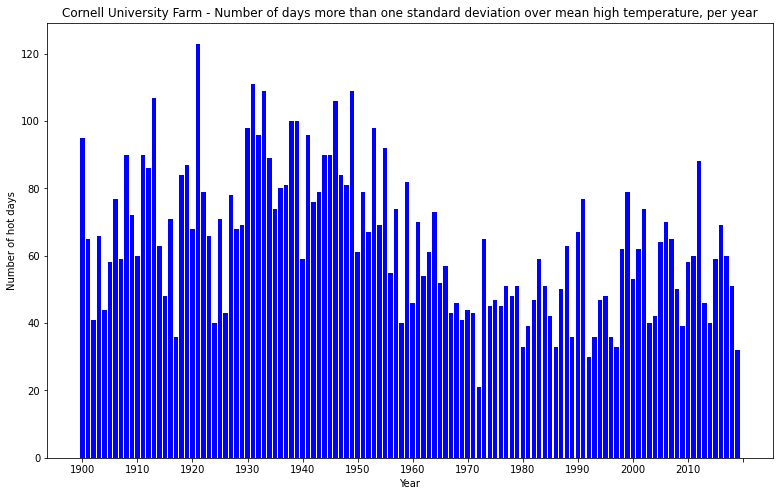

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))
fig = plt.bar(hot_days_per_year_df["Year"], hot_days_per_year_df["Number"], color='blue', width=.8)
myLocator = mticker.MultipleLocator(10)
ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel('Year')
ax.set_ylabel('Number of hot days')
ax.set_title('Cornell University Farm - Number of days more than one standard deviation over mean high temperature, per year')
plt.savefig(f'CornellUhotdaysperyear')

In [31]:
#Count the number of heat waves per year using the hot days df and the calculated values df - new version
#hot days df
#  Year    DOY  Hi  Low  Hi Mean
#0 1900    19  51   38     49.3
#1 1900    20  57   38     47.8
#2 1900    21  50   38     48.3
#3 1900    23  51   40     51.0
#4 1900    35  48   37     46.8
#hot_days_df.iterrows() returns tuples of row index, row data as a pandas series
#(0, Year       1900
#DOY          19
#Hi           51
#Low          38
#Hi Mean    49.3
#Name: 0, dtype: object)

heat_waves_annual_count = {} #count the number of heat waves per year
for year in years:
    heat_waves_annual_count[year] = 0

list_of_heat_waves = []

heat_wave_length = 1
for row in hot_days_df.iterrows(): #the iterrows() function returns a tuple

    if row[0] == 0: #seed variables for the first row
        day1 = row[1]["DOY"]
        year = row[1]["Year"]
        first_row = row
        total_of_temps = row[1]["Hi"] #sum the temps of the days of the heat wave
    else:
        if row[1]["DOY"] == day1 + heat_wave_length: #consecutive day
            heat_wave_length += 1
            total_of_temps += row[1]["Hi"]
            if heat_wave_length == 2:
                heat_waves_annual_count[row[1]["Year"]] += 1 #heat waves starting Dec 31 will count in the following year
        else:
            if heat_wave_length > 1:
                list_of_heat_waves.append([year, day1, round(total_of_temps/heat_wave_length,1), heat_wave_length])
            day1 = row[1]["DOY"] # start the process over
            year = row[1]["Year"]
            total_of_temps = row[1]["Hi"]
            first_row = row
            heat_wave_length = 1            


In [32]:
# lets find out the average temp and the duration of the heat waves, per year
list_of_heat_waves

[['1900', 10, 43.5, 2],
 ['1900', 20, 51.5, 2],
 ['1900', 39, 48.5, 2],
 ['1900', 43, 49.7, 3],
 ['1900', 120, 75.5, 2],
 ['1900', 134, 87.0, 3],
 ['1900', 158, 85.5, 2],
 ['1900', 178, 90.3, 3],
 ['1900', 187, 91.7, 3],
 ['1900', 197, 94.0, 3],
 ['1900', 218, 95.0, 7],
 ['1900', 236, 89.5, 8],
 ['1900', 245, 91.3, 3],
 ['1900', 249, 87.0, 2],
 ['1900', 253, 89.3, 3],
 ['1900', 259, 82.0, 2],
 ['1900', 269, 87.5, 2],
 ['1900', 276, 84.0, 6],
 ['1900', 295, 70.8, 6],
 ['1900', 302, 66.5, 2],
 ['1900', 323, 63.6, 5],
 ['1900', 357, 47.3, 3],
 ['1901', 15, 47.5, 2],
 ['1901', 118, 76.0, 3],
 ['1901', 127, 76.5, 2],
 ['1901', 156, 86.5, 2],
 ['1901', 164, 87.0, 2],
 ['1901', 177, 93.9, 9],
 ['1901', 195, 92.2, 5],
 ['1901', 201, 91.3, 6],
 ['1901', 209, 91.3, 3],
 ['1901', 232, 88.2, 4],
 ['1901', 248, 88.7, 3],
 ['1901', 283, 73.7, 3],
 ['1901', 296, 69.0, 2],
 ['1901', 303, 67.7, 3],
 ['1901', 347, 55.3, 3],
 ['1902', 58, 51.8, 4],
 ['1902', 70, 61.3, 3],
 ['1902', 112, 85.0, 2],
 ['1902

In [33]:
#need to turn the list of heat waves into an annual count
list_of_heat_waves_df = pd.DataFrame(list_of_heat_waves, columns=["Year", "Start","Avg Temp", "Length"])
list_of_heat_waves_df.head(5)

,Year,Start,Avg Temp,Length
0,1900,10,43.5,2
1,1900,20,51.5,2
2,1900,39,48.5,2
3,1900,43,49.7,3
4,1900,120,75.5,2


In [34]:
list_of_heat_waves_df.head(5)

,Year,Start,Avg Temp,Length
0,1900,10,43.5,2
1,1900,20,51.5,2
2,1900,39,48.5,2
3,1900,43,49.7,3
4,1900,120,75.5,2


In [36]:
#make a list of the number of heatwaves per year
heat_wave_annual_count = {}
for year in years:
    heat_wave_annual_count[year] = list_of_heat_waves_df[list_of_heat_waves_df["Year"]==year]["Year"].count()
hw_annual_count_df = pd.DataFrame(heat_wave_annual_count, index= [0]).T
hw_annual_count_df.reset_index(inplace=True)
hw_annual_count_df.rename(columns = {'index':'Year', 0:'Number'}, inplace = True)


In [37]:
for year in years:
    print(hw_annual_count_df[hw_annual_count_df["Year"]==year])

   Year  Number
0  1900      22
   Year  Number
1  1901      15
   Year  Number
2  1902       9
   Year  Number
3  1903      16
   Year  Number
4  1904      13
   Year  Number
5  1905      14
   Year  Number
6  1906      22
   Year  Number
7  1907      17
   Year  Number
8  1908      21
   Year  Number
9  1909      20
    Year  Number
10  1910      12
    Year  Number
11  1911      20
    Year  Number
12  1912      21
    Year  Number
13  1913      31
    Year  Number
14  1914      17
    Year  Number
15  1915      13
    Year  Number
16  1916      19
    Year  Number
17  1917      10
    Year  Number
18  1918      20
    Year  Number
19  1919      18
    Year  Number
20  1920      17
    Year  Number
21  1921      31
    Year  Number
22  1922      23
    Year  Number
23  1923      19
    Year  Number
24  1924      11
    Year  Number
25  1925      18
    Year  Number
26  1926      13
    Year  Number
27  1927      24
    Year  Number
28  1928      19
    Year  Number
29  1929      15


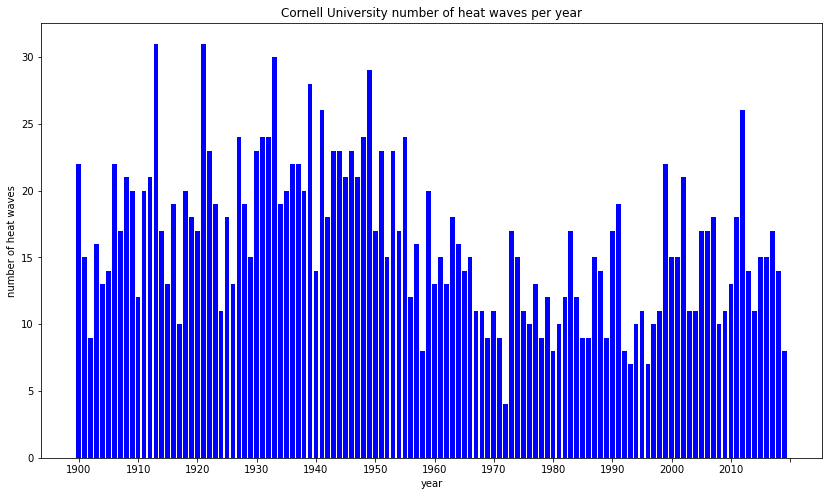

In [52]:
#plot the number of heatwaves per year

wavefig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
myLocator = mticker.MultipleLocator(10)
ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel('year')
ax.set_ylabel('number of heat waves')
ax.set_title('Cornell University number of heat waves per year')
wavefig = plt.bar(years, hw_annual_count_df["Number"], color='blue')
#ax.plot(years, heat_waves_annual_list)
plt.savefig(f'CornellUheatwavesyear')


In [39]:
heat_waves_by_decade = {} 
pointer = 0
for index in range(12):
    heat_waves_by_decade[index*10+1900] = 0
    for index2 in range(10):
        heat_waves_by_decade[index*10+1900] += hw_annual_count_df[hw_annual_count_df.index == pointer]["Number"].item() #calculate heat waves per 10 year period
        pointer += 1
heat_waves_by_decade

{1900: 169,
 1910: 181,
 1920: 190,
 1930: 232,
 1940: 222,
 1950: 175,
 1960: 135,
 1970: 111,
 1980: 115,
 1990: 122,
 2000: 146,
 2010: 151}

In [40]:
hwdf = pd.DataFrame.from_dict(heat_waves_by_decade, orient='index', columns=["Number"])
hwdf.reset_index(inplace=True)
hwdf.loc[:,"Decade"] = hwdf.loc[:,"index"].astype(int).astype(str).copy()
hwdf.drop("index", axis=1, inplace=True)
hwdf

,Number,Decade
0,169,1900
1,181,1910
2,190,1920
3,232,1930
4,222,1940
5,175,1950
6,135,1960
7,111,1970
8,115,1980
9,122,1990


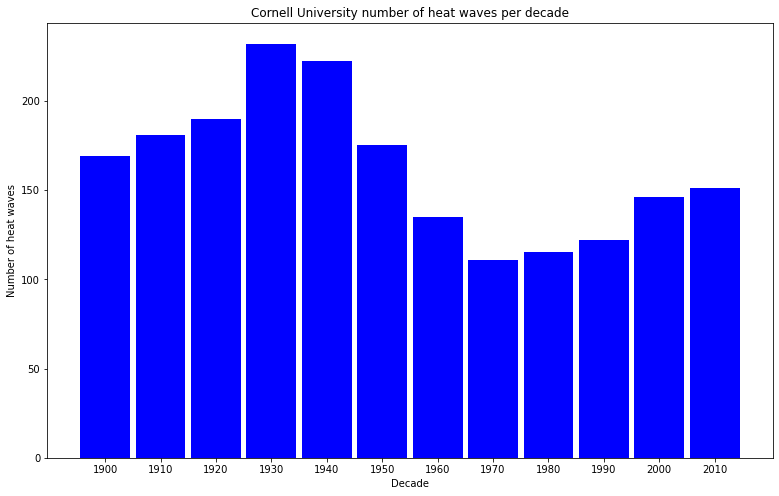

In [60]:
wavefig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(13,8))
wavefig2 = plt.bar(hwdf.loc[:,"Decade"], hwdf.loc[:,"Number"], color='blue', width=.9)
ax2.set_xlabel('Decade')
ax2.set_ylabel('Number of heat waves')
ax2.set_title('Cornell University number of heat waves per decade')
plt.savefig(f'CornellUTemphotheatwavesdecade')
hwdf.to_csv('CornellHWDF.csv')

In [ ]:
for item in list_of_heat_waves:
    print(item)

In [41]:
day_index = 5 #change this number to pick different days from the key_dates list
#0, 3, 4, 5, 7, 10
key_dates = [[1900, 1, 1], [1900, 2, 14], [1900, 3, 3], [1900, 3, 20], [1900, 6, 21], [1900, 7, 4], [1900, 8, 13], [1900, 9, 23], [1900, 10, 15], [1900, 11, 1], [1900, 12, 21], [1900, 12, 25]]

key_days = []
title_days = []
for item in key_dates:
    itemdate = datetime(item[0], item[1], item[2])
    titledate = f"{item[1]}/{item[2]}"
    key_days.append(itemdate.timetuple().tm_yday)
    title_days.append(titledate)
key_days.sort()
print(key_days)
print(title_days)
hot_days_df

[1, 45, 62, 79, 172, 185, 225, 266, 288, 305, 355, 359]
['1/1', '2/14', '3/3', '3/20', '6/21', '7/4', '8/13', '9/23', '10/15', '11/1', '12/21', '12/25']


,Year,DOY,Hi,Low,Hi Mean
0,1900,8,44,32,42.6
1,1900,10,45,32,42.4
2,1900,11,42,31,41.4
3,1900,20,54,32,42.9
4,1900,21,49,32,43.8
...,...,...,...,...,...
7717,2019,357,48,35,44.3
7718,2019,358,55,35,44.9
7719,2019,361,45,32,42.5
7720,2019,362,55,34,43.8


In [42]:
# determine the DOY for specific key dates througout the year
# holidays - Jan 1, Valentine's Day, July 4, Labor Day
holidays = [[1900, 1, 1], [1900, 2, 14], [1900, 7, 4], [1900, 9, 3]]
# birthdays - Frank's, Mine, Emily's, John's
birthdays = [[1900, 1, 4], [1900, 3, 3], [1900, 8, 12], [1900, 11, 1]]
# solar events - solictice, equinox
key_dates = [[1900, 3, 20], [1900, 6, 21], [1900, 9, 23], [1900, 12, 21]]

key_days = []
title_days = []
for item in key_dates:
    itemdate = datetime(item[0], item[1], item[2])
    titledate = f"{item[1]}/{item[2]}"
    key_days.append(itemdate.timetuple().tm_yday)
    title_days.append(titledate)
key_days.sort()

79 3/20 -0.07297729008958947 47.87548209366391 43
172 6/21 -0.03206125425376785 79.93264462809921 78
266 9/23 -0.055236474755191355 73.17823691460057 69
355 12/21 -0.0029863184943399513 35.12768595041323 34


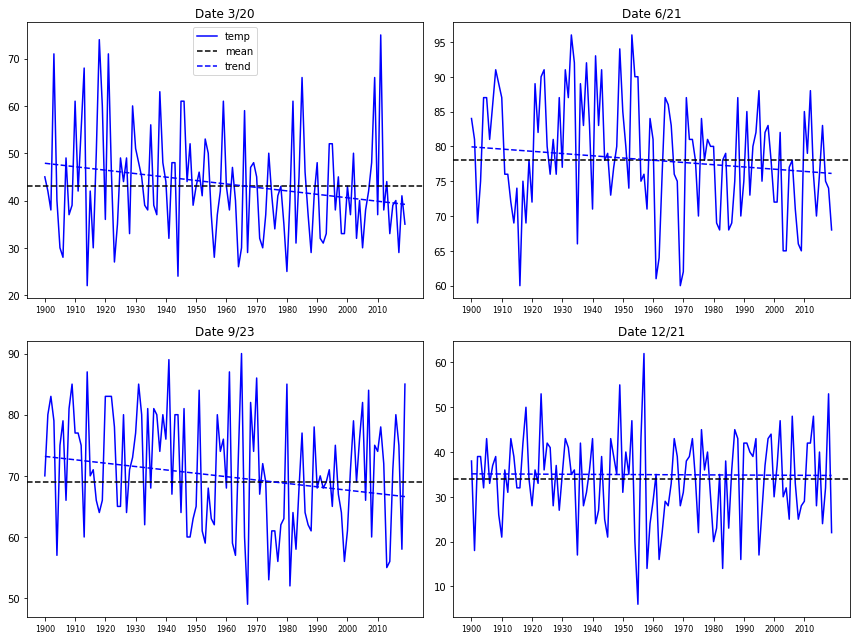

In [51]:
# plot four key day's hi temps in a 2 x 2 set of sub-plots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for day_index in range(0, 4):
#get the temp data for a particular day across all years
    day_to_plot = key_days[day_index]
    day_temps = sorted_data[sorted_data["DOY"]==day_to_plot].copy()
    day_temps.reset_index(drop=True, inplace=True)
    hi_mean = calcd_df.loc[day_to_plot, "Hi mean"]
    h = day_temps["Hi"]
    x = [x for x in range(0, len(day_temps["Hi"]))]

# numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    hc0 = calcd_df.loc[day_to_plot, "H slope"]
    hc1 = calcd_df.loc[day_to_plot, "H intercept"]
    print(day_to_plot, title_days[day_index], hc0, hc1, hi_mean)
    a = int(day_index/2)
    b = day_index%2
    axes[a][b].plot(x, h, 'b', label='temp')
    axes[a][b].title.set_text(f'Date {title_days[day_index]}')
    axes[a][b].axhline(hi_mean, color='k', linestyle='--', label='mean')
    axes[a][b].plot([hc0*lx + hc1 for lx in range(len(x))], 'b--', label='trend')
    if day_index == 0:
         axes[a][b].legend()
    axes[a][b].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
    axes[a][b].set_xticklabels([xlable for xlable in years if xlable[3:4]=='0'], fontsize=8)
    fig.tight_layout()
    plt.savefig(f'CornellUTempkeydays')


7/4 185
Hi coefficients -0.032283491909160335 82.6292011019284
Hi NRMSE: 0.16671960390326362
Lo coefficients 0.026258767969997866 56.88760330578514


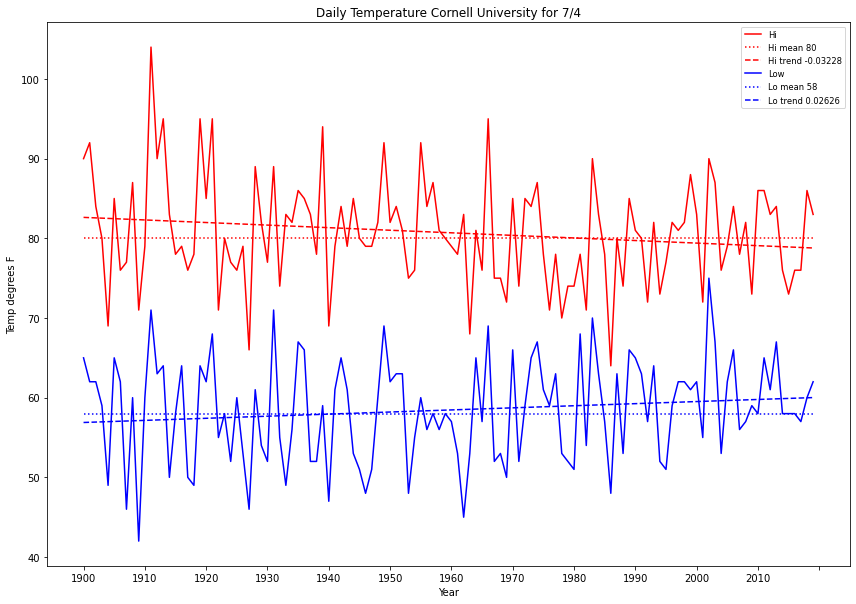

In [43]:
item = [2021,7,4]
itemdate = datetime(item[0], item[1], item[2])
day_to_plot = itemdate.timetuple().tm_yday
titledate = f"{item[1]}/{item[2]}"
print(titledate, day_to_plot)

day_temps = sorted_data[sorted_data["DOY"]==day_to_plot].copy()
day_temps.reset_index(drop=True, inplace=True)

#calc the means
hi_mean = int(day_temps["Hi"].mean())
lo_mean = int(day_temps["Lo"].mean())


h = day_temps["Hi"]
l = day_temps["Lo"]
x = day_temps["Year"]

hcoefficients, hresiduals, _, _, _ = np.polyfit(day_temps.index,h,1,full=True)
hmse = hresiduals[0]/(len(day_temps.index))
hnrmse = np.sqrt(hmse)/(h.max() - h.min())
hnrmse
print(f'Hi coefficients {hcoefficients[0]} {hcoefficients[1]}')
print('Hi NRMSE: ' + str(hnrmse))

lcoefficients, lresiduals, _, _, _ = np.polyfit(day_temps.index,l,1,full=True)
lmse = lresiduals[0]/(len(day_temps.index))
lnrmse = np.sqrt(lmse)/(l.max() - l.min())
print(f'Lo coefficients {lcoefficients[0]} {lcoefficients[1]}')
#print('Lo NRMSE: ' + str(lnrmse))

#all the plotting code below needs to be in one cell in order to properly manipulate the subplot
fig, axes = plt.subplots(figsize=(12,8.5))
axes.plot(x, h, 'r', label='Hi')
axes.plot([hi_mean for lm in range(len(x))], "r:", label=f'Hi mean {hi_mean}')
axes.plot([hcoefficients[0]*lx + hcoefficients[1] for lx in range(len(x))], 'r--', label=f'Hi trend {round(hcoefficients[0],5)}')

axes.plot(x, l, 'b', label="Low")
axes.plot([lo_mean for lm in range(len(x))], "b:", label=f'Lo mean {lo_mean}')
axes.plot([lcoefficients[0]*lx + lcoefficients[1] for lx in range(len(x))], 'b--', label=f'Lo trend {round(lcoefficients[0],5)}')

axes.set_xlabel('Year')
axes.set_ylabel('Temp degrees F')
axes.set_title(f"Daily Temperature Cornell University for {titledate}")
axes.legend(loc="best", fontsize='small')
# set the x axis to every 10 years so the labels don't overlap
myLocator = mticker.MultipleLocator(10)
axes.xaxis.set_major_locator(myLocator)
fig.tight_layout()
plt.savefig(f'CornellUTemp{day_to_plot}')

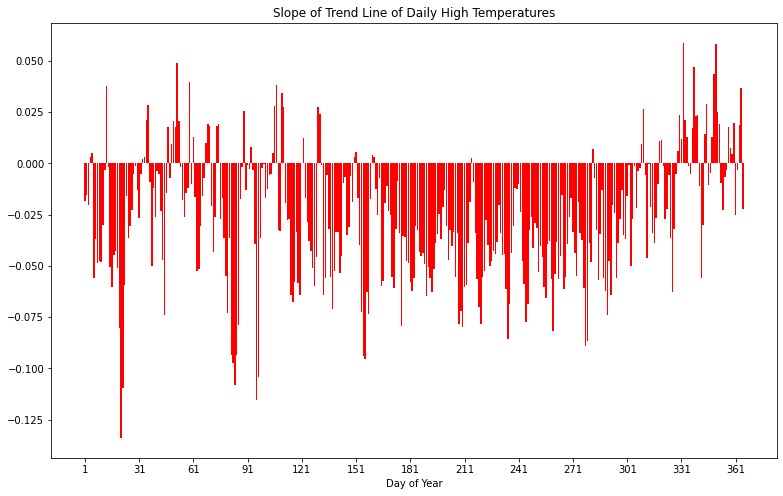

In [31]:
#This section plots the slope of the trend lines as a vertical bar chart
#and compares the overall change in hi and low temps over the 
#122 years of the data

fig3, axes3 = plt.subplots(figsize=(13,8))
fig3 = plt.bar(calcd_df["Day"], calcd_df["H slope"], color='red')
axes3.plot()
myLocator3 = mticker.MultipleLocator(30)
axes3.xaxis.set_major_locator(myLocator3)
axes3.set_xlabel('Day of Year')
axes3.set_title(f"Slope of Trend Line of Daily High Temperatures")
plt.savefig(f'CornellUHiTempTrends')

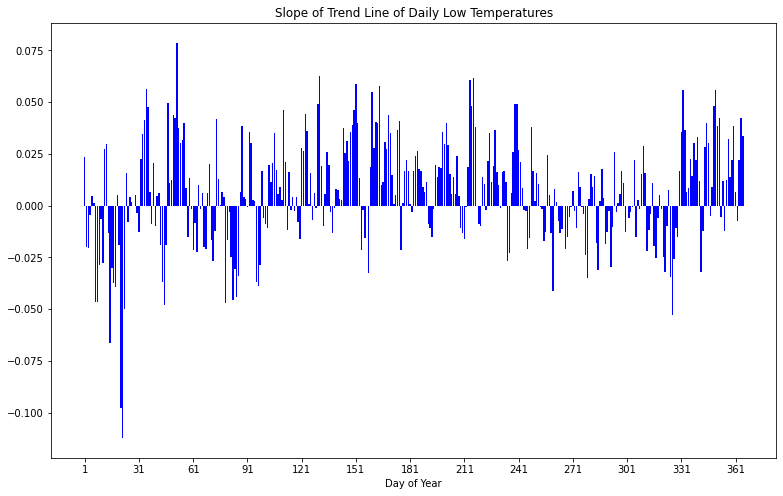

In [32]:

fig3, axes3 = plt.subplots(figsize=(13,8))
fig3 = plt.bar(calcd_df["Day"], calcd_df["L slope"], color='blue')
axes3.plot()
myLocator3 = mticker.MultipleLocator(30)
axes3.xaxis.set_major_locator(myLocator3)
axes3.set_xlabel('Day of Year')
axes3.set_title(f"Slope of Trend Line of Daily Low Temperatures")
plt.savefig(f'CornellULoTempTrends')

In [33]:
sum_low_trend = calcd_df["L slope"].sum()
mean_low_trend = calcd_df["L slope"].mean()
sum_high_trend = calcd_df["H slope"].sum()
mean_high_trend = calcd_df["H slope"].mean()
print(f"Hi sum {sum_high_trend}, mean {mean_high_trend}, Lo sum {sum_low_trend}, mean {mean_low_trend}")

Hi sum -10.059927772762016, mean -0.02756144595277268, Lo sum 2.2103375234391196, mean 0.0060557192422989545


In [44]:
#plot the average temperature, aka intensity, and the average duration of the heat waves per decade
#list_of_heat_waves_df.head(5)
#   Year   Start   Avg Temp  Length
#0  1900    19      52.7      3
#1  1900   133      87.3      3

#make a list of the number of heatwaves per year
hw_intensity = {}
hw_duration = {}
for year in years:
    hw_intensity[year] = list_of_heat_waves_df[list_of_heat_waves_df["Year"]==year]["Avg Temp"].sum()
    hw_intensity[year] = round(hw_intensity[year]/list_of_heat_waves_df[list_of_heat_waves_df["Year"]==year]["Avg Temp"].count(), 3)
    hw_duration[year] = list_of_heat_waves_df[list_of_heat_waves_df["Year"]==year]["Length"].sum()
    hw_duration[year] = round(hw_duration[year]/list_of_heat_waves_df[list_of_heat_waves_df["Year"]==year]["Length"].count(), 3)
hw_intensity_df = pd.DataFrame([hw_intensity, hw_duration], index=[0, 1]).T
hw_intensity_df.reset_index(inplace=True)   
hw_intensity_df.rename(columns = {'index':'Year', 0:'Avg Temp', 1:'Avg Duration'}, inplace = True)
hw_intensity_df.head(5)



,Year,Avg Temp,Avg Duration
0,1900,75.955,3.364
1,1901,78.987,3.467
2,1902,68.478,2.778
3,1903,69.256,3.375
4,1904,75.131,2.538


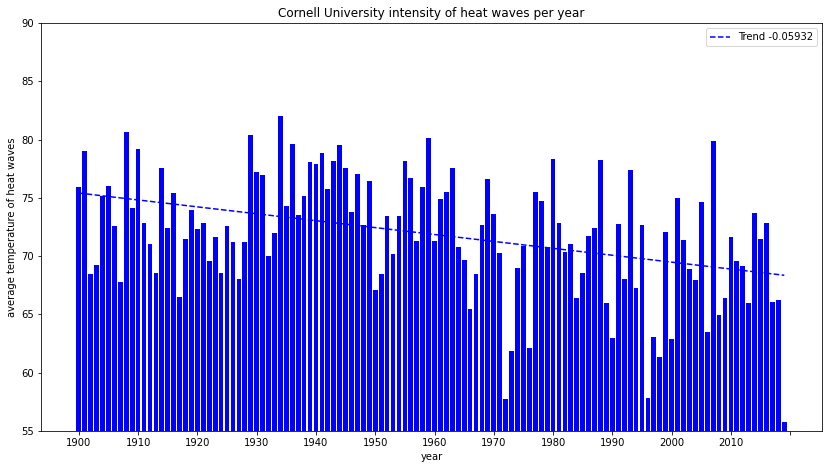

In [57]:
#plot the intensity of heat waves per year

wavefig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7.5))
myLocator = mticker.MultipleLocator(10)
ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel('year')
ax.set_ylabel('average temperature of heat waves')
ax.set_title('Cornell University intensity of heat waves per year')
ax = plt.gca()
ax.set_ylim([55, 90])
wavefig = plt.bar(years, hw_intensity_df["Avg Temp"], color='b')
h = hw_intensity_df["Avg Temp"]
hcoefficients, hresiduals, _, _, _ = np.polyfit(hw_intensity_df.index,h,1,full=True)
ax.plot([hcoefficients[0]*lx + hcoefficients[1] for lx in range(len(years))], 'b--', label=f'Trend {round(hcoefficients[0],5)}')
ax.legend()

plt.savefig(f'CornellUheatwavesintensityyear')

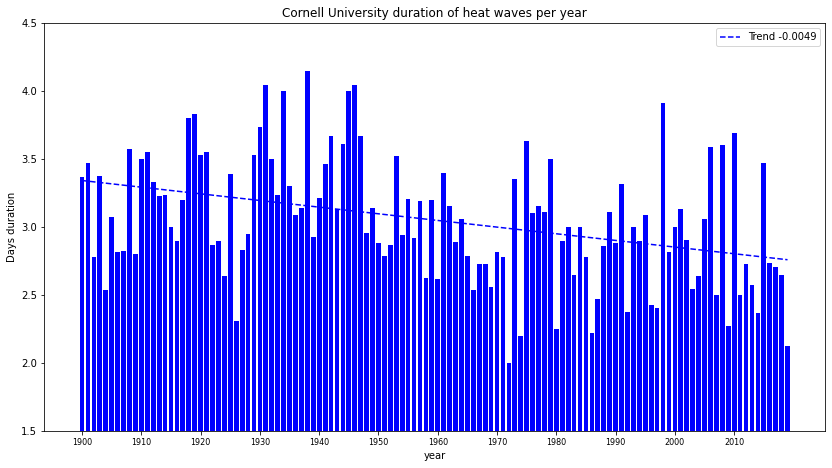

In [59]:
#plot the duration of heat waves per year

wavefig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7.5))
#myLocator = mticker.MultipleLocator(10)
#ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel('year')
ax.set_ylabel('Days duration')
ax.set_title('Cornell University duration of heat waves per year')
ax = plt.gca()
ax.set_ylim([1.5, 4.5])
x = [x for x in range(0, len(day_temps["Hi"]))] 
wavefig = plt.bar(x, hw_intensity_df["Avg Duration"], color='b')
h = hw_intensity_df["Avg Duration"]
hcoefficients, hresiduals, _, _, _ = np.polyfit(hw_intensity_df.index,h,1,full=True)
ax.plot([hcoefficients[0]*lx + hcoefficients[1] for lx in range(len(years))], 'b--', label=f'Trend {round(hcoefficients[0],5)}')

ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
ax.set_xticklabels([xlable for xlable in years if xlable[3:4]=='0'], fontsize=8)

ax.legend()

plt.savefig(f'CornellUheatwavesdurationyear')

In [45]:
#get the heat wave intensity per decade
#hw_intensity_df.head(5)
#    Year   Avg Temp   Avg Duration
#0   1900    82.594       2.562
#1   1901    77.586       3.000
#2   1902    65.300       2.400
#3   1903    69.971       2.857
#4   1904    81.367       2.167

decades = ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']

hw_int_dec_df = pd.DataFrame(
    columns=['Avg Intensity', 'Avg Duration'],
    index=decades)


for indx in range(12):
    decade = indx*10+1900
    hw_int_dec_df.loc[str(decade), "Avg Intensity"] = hw_intensity_df.loc[(hw_intensity_df["Year"] >= str(decade)) & (hw_intensity_df["Year"] < str(decade+10)), "Avg Temp"].sum() / hw_intensity_df.loc[(hw_intensity_df["Year"] >= str(decade)) & (hw_intensity_df["Year"] < str(decade+10)), "Avg Temp"].count()
    hw_int_dec_df.loc[str(decade), "Avg Duration"] = hw_intensity_df.loc[(hw_intensity_df["Year"] >= str(decade)) & (hw_intensity_df["Year"] < str(decade+10)), "Avg Duration"].sum() / hw_intensity_df.loc[(hw_intensity_df["Year"] >= str(decade)) & (hw_intensity_df["Year"] < str(decade+10)), "Avg Duration"].count()
    
hw_int_dec_df

,Avg Intensity,Avg Duration
1900,73.8994,3.0606
1910,72.8873,3.3572
1920,71.8341,3.0488
1930,75.888,3.512
1940,76.7799,3.4888
1950,73.4848,3.0133
1960,72.2835,2.8449
1970,68.6343,2.965
1980,71.582,2.7232
1990,67.5241,2.912


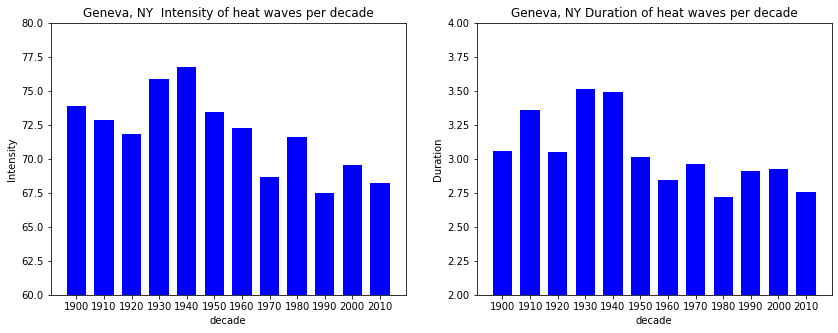

In [61]:
#plot intensity and duration of heat waves per decade

wavefig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].set_xlabel('decade')
ax[0].set_ylabel('Intensity')
ax[0].set_title('Geneva, NY  Intensity of heat waves per decade')
ax[0].set_ylim([60, 80])
ax[0].bar(decades, hw_int_dec_df["Avg Intensity"], width=.7, color='b')
#h = hw_int_dec_df["Avg Intensity"]
#hcoefficients, hresiduals, _, _, _ = np.polyfit(hw_int_dec_df.index,h,1,full=True)
#ax[0].plot([hcoefficients[0]*lx + hcoefficients[1] for lx in range(len(years))], 'b--', label=f'Trend {round(hcoefficients[0],5)}')
#ax[0].legend()
ax[1].set_xlabel('decade')
ax[1].set_ylabel('Duration')
ax[1].set_title('Geneva, NY Duration of heat waves per decade')
ax[1].set_ylim([2, 4])
ax[1].bar(decades, hw_int_dec_df["Avg Duration"], width=.7, color='b')

plt.savefig(f'CornellUheatwavesdurationdecade')
hw_int_dec_df.to_csv('CornellHWIntDur.csv')

In [ ]:
# don't mess below this cell!

In [ ]:
#reformat the data to set up for a grid of temps vs. years
#
#    DOY    Temp    1898    1899    1900    
#     1      Hi      xx       yy      zz 
#            Lo      aa       bb      cc  
#     2      Hi      ll       mm      nn  ....

final_day_temps = day_temps.drop(["Year", "DOY"], axis=1)
final_day_temps = final_day_temps.transpose()
final_day_temps

In [ ]:
final_day_temps["DOY"] = [1,1] #need to get the actual doy before dropping
final_day_temps["Type"] = ["Hi", "Lo"]
final_day_temps.set_index(["DOY", "Type"], drop=True, inplace = True)
final_day_temps.columns=[years]
final_day_temps

In [ ]:
final_day_temps.loc[1,:].loc["Hi",:].describe()

In [ ]:
final_day_temps.loc[1,:].loc["Hi",:].median()

In [ ]:
final_day_temps.loc[1,:].loc["Hi",:][final_day_temps.loc[1,:].loc["Hi",:]>40]